<a href="https://colab.research.google.com/github/erika290262/dsl/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1
Let's create a k-regular undirected graph 

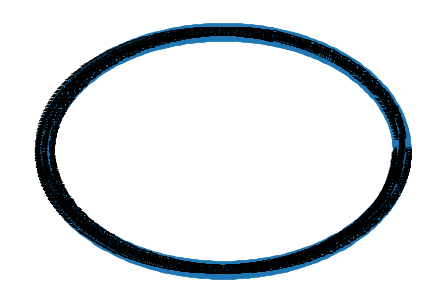

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
from scipy import sparse
import numpy as np
from collections import Counter
import pandas as pd

n_nodes = 500

G = nx.cycle_graph(n_nodes)

for n in range(n_nodes):
    G.add_edge(n,((n+2) % n_nodes))
    G.add_edge(n,((n-2) % n_nodes))

pos = nx.circular_layout(G)

nx.draw(G,pos,with_labels=True)

Let $p_i$ denote the probability that the outbreak size is $i$. It is straighforward to notice that

$$
p_1 = \frac{1}{2\beta+1}.
$$

For $n>i>1$, it is necessary that the first node infects a second node (probability $2\beta/(2\beta+1)$). For a given $i$, there are multiple paths (specifically, $i-1$ paths) from configuration $(2,2)$ to $(i,0)$, each of them with probability

$$
\left(\frac{\beta}{\beta+1}\right)^{i-2} \left(\frac{1}{\beta+1}\right)^2.
$$

Thus, 

$$
p_i = \frac{2\beta}{2\beta+1} \cdot (i-1) \cdot \left(\frac{\beta}{\beta+1}\right)^{i-2} \left(\frac{1}{\beta+1}\right)^2.
$$

For $p_n$ there are $n-2$ paths with probability $\left(\frac{\beta}{\beta+1}\right)^{n-2} \left(\frac{1}{\beta+1}\right)$ and $1$ path with probability $\left(\frac{\beta}{\beta+1}\right)^{n-2}$.

Putting all together,

$$
\begin{cases}
p_1 = \frac{1}{2\beta+1} \\
p_i = \frac{2\beta}{2\beta+1} \cdot (i-1) \cdot \left(\frac{\beta}{\beta+1}\right)^{i-2} \left(\frac{1}{\beta+1}\right)^2 \quad 1<i<n \\
p_n = \frac{2\beta}{2\beta+1} \cdot \left((n-2) \left(\frac{\beta}{\beta+1}\right)^{n-2} \left(\frac{1}{\beta+1}\right) + \left(\frac{\beta}{\beta+1}\right)^{n-2} \right)
\end{cases}
$$

In [35]:
beta=0.3#infecting prob
rho=0.7#recovering prob
node_link_activation=[1/(1+beta), 1-(1/(1+beta))]
node_link_activ_sum=np.cumsum(node_link_activation)

[11.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
[11.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.]
[11.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.]
[11.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.]
[11.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1.]
[11.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1.]
[11.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.]
[11.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.]
[11.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.]
[11.  1.

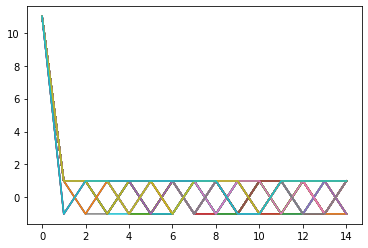

In [36]:
# Number of agents, the number of nodes in the graph
n_agents = len(G)

# S=0, I=1, R=2

# Mutation kernel
psi = np.array([[1,0,0],
                [0,0,1],
                [0,0,1]])

# Nodes activation rate rho
rho = 0.7

# Pairwise interaction kernels
# 3-dimensional array
phi = np.array([[[1,0,0],
                 [0,1,0],
                 [0,0,1]], 
                [[0,1,0],
                 [0,1,0],
                 [0,0,1]],
                [[1,0,0],
                 [0,1,0],
                 [0,0,1]]])

# Links activation rate beta
beta = 0.3

# Adjacency matrix, interactions are encoded in the graph.
W = nx.convert_matrix.to_numpy_matrix(G)

# Number of states for each agent
n_states = tuple(3 for _ in range(n_agents))

# Initialize the time
time = np.zeros(15)
t_next = 0
week1s=np.zeros(100)
week2s=np.zeros(100)
week3s=np.zeros(100)
week4s=np.zeros(100)
week5s=np.zeros(100)
week6s=np.zeros(100)
week7s=np.zeros(100)
week8s=np.zeros(100)
week9s=np.zeros(100)
week10s=np.zeros(100)
week11s=np.zeros(100)
week12s=np.zeros(100)
week13s=np.zeros(100)
week14s=np.zeros(100)
week15s=np.zeros(100)
week1r=np.zeros(100)
week2r=np.zeros(100)
week3r=np.zeros(100)
week4r=np.zeros(100)
week5r=np.zeros(100)
week6r=np.zeros(100)
week7r=np.zeros(100)
week8r=np.zeros(100)
week9r=np.zeros(100)
week10r=np.zeros(100)
week11r=np.zeros(100)
week12r=np.zeros(100)
week13r=np.zeros(100)
week14r=np.zeros(100)
week15r=np.zeros(100)
week1i=np.zeros(100)
week2i=np.zeros(100)
week3i=np.zeros(100)
week4i=np.zeros(100)
week5i=np.zeros(100)
week6i=np.zeros(100)
week7i=np.zeros(100)
week8i=np.zeros(100)
week9i=np.zeros(100)
week10i=np.zeros(100)
week11i=np.zeros(100)
week12i=np.zeros(100)
week13i=np.zeros(100)
week14i=np.zeros(100)
week15i=np.zeros(100)

for i in range(100):

  #inizialize the variables
  new_i=np.zeros(15)
  s=np.zeros(15)
  inf=np.zeros(15)
  r=np.zeros(15)
  lst1=[]
  lst2=[]
  lst3=[]
  # store the ids of visited configurations, describing the state of each agent
  states = list()
  # in the initial configuration, agent 0 is infected
  x0 = np.zeros(n_agents, dtype=int)
  x0[4] = 1
  x0[7] = 1
  x0[3] = 1
  x0[8] = 1
  x0[9] = 1
  x0[1] = 1
  x0[40] = 1
  x0[30] = 1
  x0[76] = 1
  x0[45] = 1
  
  #x0 = tuple(x0)

  # define initial state (time 0)
  states.append(tuple(x0))


  j=1
  for j in range(15):
      # consider the current configuration
      x = np.array(states[j-1])
      # define a list of admissible destination configurations, 
      # and the rates of the corresponding transitions
      destinations = list()
      transition_rates = list()    
      # admissible destinations differ from the current configuration
      # for the state of a single agent
      for agent in range(n_agents):
          # compute the neighbors of the other_agent in the graph
          neighbors = [i for i in G.neighbors(agent)]
          infected = sum(list(filter(lambda k:k==1, x[neighbors])))
          phi_xy = 1 - (1-beta)**infected
          # construct an admissible destination and append it to the list
          y = np.array(x)
          y[agent] = 1-y[agent]
          y_id = tuple(y)
          destinations.append(y_id)
          # compute the transition rate from x to y
          rate = 0
          for other_agent in range(n_agents):
              # for every other_agent in the network, 
              # compute its contribution to the rate of the transition of the agent
              rate += psi[x[agent],y[agent]]*rho + beta*W[agent,other_agent]*phi[x[other_agent], x[agent], y[agent]]*phi_xy
          transition_rates.append(rate) 
      # given all transition rates from x to admissible y
      # compute w_x, the clock rate of configuration x
      # Notice: transition_rates is the x-th row of Lambda
      transition_rates = np.array(transition_rates)
      w_x = np.sum(transition_rates)
      # probabilities of transitioning to each admissible configuration y
      probabilities = transition_rates / w_x
      # next state is chosen at random from the possible destination 
      # with the probability distribution probabilities
      index_destin = np.arange(len(destinations))
      index_destin = np.random.choice(index_destin, p=probabilities)
      states.append(destinations[index_destin])
      node_link_activ=(node_link_activ_sum>np.random.rand())[1]

      #for agent in range(n_agents):
      agent_index=destinations[index_destin][0]
      actual_status=x[agent_index]
      if x0[index_destin] == 2:
          new_status=x0[index_destin]
      else:
        if (node_link_activ==0 or w_x==0):
          new_status=x0[index_destin]
        if (node_link_activ==1):
          new_status=x0[index_destin]+1
          #print(new_status)
      x0[index_destin]=new_status
        #print(x)
      
      states[0]=x

      
      time[j]=j
      #print(node_link_activ)
      #if w_x == 0:
       # states[i] = states[i-1]
       ## else, transition probabilities are computed as transition_rates/w_x
       ## and the next config is chosen accordingly.
       ## Notice: this is the x-th row of P
      #else:
       # states[i] = np.random.choice(destinations, probabilities)
      t_next += -np.log(np.random.rand())/w_x
      
      s[j]=len(np.argwhere(x0==0))
      inf[j]=len(np.argwhere(x0==1))
      r[j]=len(np.argwhere(x0==2))

      if(j==0):
        week1s[i]=s[j]
        week1i[i]=inf[j]
        week1r[i]=r[j]
      if(j==1):
        week2s[i]=(s[j])
        week2i[i]=(inf[j])
        week2r[i]=(r[j])
      if(j==2):
        week3s[i]=(s[j])
        week3i[i]=(inf[j])
        week3r[i]=(r[j])
      if(j==3):
        week4s[i]=(s[j])
        week4i[i]=(inf[j])
        week4r[i]=(r[j])
      if(j==4):
        week5s[i]=(s[j])
        week5i[i]=(inf[j])
        week5r[i]=(r[j])
      if(j==5):
        week6s[i]=(s[j])
        week6i[i]=(inf[j])
        week6r[i]=(r[j])
      if(j==6):
        week7s[i]=(s[j])
        week7i[i]=(inf[j])
        week7r[i]=(r[j])
      if(j==7):
        week8s[i]=(s[j])
        week8i[i]=(inf[j])
        week8r[i]=(r[j])
      if(j==8):
        week9s[i]=(s[j])
        week9i[i]=(inf[j])
        week9r[i]=(r[j])
      if(j==9):
        week10s[i]=(s[j])
        week10i[i]=(inf[j])
        week10r[i]=(r[j])
      if(j==10):
        week11s[i]=(s[j])
        week11i[i]=(inf[j])
        week11r[i]=(r[j])        
      if(j==11):
        week12s[i]=(s[j])
        week12i[i]=(inf[j])
        week12r[i]=(r[j])
      if(j==12):
        week13s[i]=(s[j])
        week13i[i]=(inf[j])
        week13r[i]=(r[j])
      if(j==13):
        week14s[i]=(s[j])
        week14i[i]=(inf[j])
        week14r[i]=(r[j])
      if(j==14):
        week15s[i]=(s[j])
        week15i[i]=(inf[j])
        week15r[i]=(r[j])

      new_i[j]=(inf[j]-inf[j-1])
  print(new_i)
  plt.plot(new_i)
      #plt.plot(new_i, time)
  #plt.plot(time,s, color="g")
  #plt.plot(time,inf, color="r")
  #plt.plot(time,r, color="b")

  #lst1.append(s)
  #lst2.append(inf)
  #lst3.append(r)
  #df=pd.DataFrame(list(zip(lst1,lst2,lst3)),columns=['susceptible','infected','recovered'])
      #print(destinations)
     # print("time", j-1)
 # print("Average Susceptible", avg_s)
 # print("Average Infected", avg_i)
 # print("Average Recovered",avg_r)

In [68]:
n_agents = len(G)
# Number of agents, the number of nodes in the graph
n_agents = len(G)

# S=0, I=1, R=2

# Mutation kernel
psi = np.array([[1,0,0],
                [0,0,1],
                [0,0,1]])

# Nodes activation rate rho
rho = 0.7 #recovery probability

# Pairwise interaction kernels
# 3-dimensional array
phi = np.array([[[1,0,0],
                 [0,1,0],
                 [0,0,1]], 
                [[0,1,0],
                 [0,1,0],
                 [0,0,1]],
                [[1,0,0],
                 [0,1,0],
                 [0,0,1]]])

# Links activation rate beta
beta = 0.3

# Adjacency matrix, interactions are encoded in the graph.
W = nx.convert_matrix.to_numpy_matrix(G)

# Number of states for each agent
n_states = tuple(3 for _ in range(n_agents))

sus=[]
inf=[]
rec=[]

# store the ids of visited configurations, describing the state of each agent
states = list()
# in the initial configuration, agent 0 is infected
x0 = np.zeros(n_agents, dtype=int)
x0[0] = 1
x0[1] = 1
x0[2] = 1
x0[3] = 1
x0[4] = 1
x0[5] = 1
x0[6] = 1
x0[7] = 1
x0[9] = 1
x0[8] = 1
#x0 = tuple(x0)
sus.append(x0)
# define initial state (time 0)
states.append(x0)
j=1
phi_xy=0
for k in range(500):
  people[k]=k
for j in range(15):
    # consider the current configuration
    x = np.array(states[j-1])
    # define a list of admissible destination configurations, 
    # and the rates of the corresponding transitions
    destinations = list()
    transition_rates = list()    
    # admissible destinations differ from the current configuration
    # for the state of a single agent
    for agent in range(n_agents):
        # compute the neighbors of the other_agent in the graph
        neighbors = [i for i in G.neighbors(agent)]
        infected = sum(list(filter(lambda k:k==1, x0[neighbors])))
        phi_xy = 1-(1-beta)**infected
        # construct an admissible destination and append it to the list
        y = np.array(x0)
        y[agent] = 1-y[agent]
        y_id = tuple(y)
        destinations.append(y_id)
        # compute the transition rate from x to y
        rate = 0
        #
        for other_agent in range(n_agents):
            # for every other_agent in the network, 
            # compute its contribution to the rate of the transition of the agent
            rate +=psi[x0[agent],y[agent]]*rho + beta*W[agent,other_agent]*phi[x0[other_agent], x0[agent], y[agent]]*phi_xy
        transition_rates.append(rate) 
    # given all transition rates from x to admissible y
    # compute w_x, the clock rate of configuration x
    # Notice: transition_rates is the x-th row of Lambda
    transition_rates = np.array(transition_rates)
    w_x = np.sum(transition_rates)
    # probabilities of transitioning to each admissible configuration y
    probabilities = transition_rates / w_x
    # next state is chosen at random from the possible destination 
    # with the probability distribution probabilities
    index_destin = np.arange(len(destinations))
    index_destin = np.random.choice(index_destin, p=probabilities)
    states.append(destinations[index_destin])
    node_link_activ = (node_link_activ_sum>np.random.rand())[0]
    if j==2:
      vax=random.sample(people,25)
      x0[vax]=2
    if j==4:
      for v in vax:
        people.remove(v)
      vax=random.sample(n,50)
      x0[vax]=2
    #for agent in range(n_agents):
    agent_index=destinations[index_destin][1]
    actual_status=x0[agent_index]
   #   x[agent_index]=2
    if node_link_activ==1:
      if(x0[index_destin]==0):
        new_status=x0[index_destin]+1
        inf.append([index_destin])
      elif(x0[index_destin]==1):
        new_status=x0[index_destin]+1
        rec.append([index_destin])
    else:
      new_status=x0[index_destin]
    x0[index_destin]=new_status

    states[0]=x0
    print(len(np.argwhere(x0==0)),len(np.argwhere(x0==1)),len(np.argwhere(x0==2)))
    print(x0)
    print(vax)
    

490 10 0
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

In [ ]:
print(psi[0,:].tolist())

[1, 0, 0]


<BarContainer object of 15 artists>

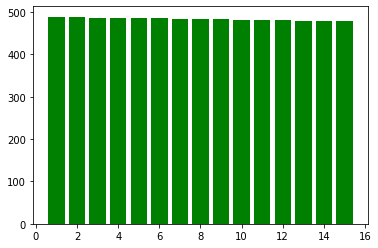

In [37]:
avg_s1=np.sum(week1s)/len(week1s)
avg_s2=np.sum(week2s)/len(week2s)
avg_s3=np.sum(week3s)/len(week3s)
avg_s4=np.sum(week4s)/len(week4s)
avg_s5=np.sum(week5s)/len(week5s)
avg_s6=np.sum(week6s)/len(week6s)
avg_s7=np.sum(week7s)/len(week7s)
avg_s8=np.sum(week8s)/len(week8s)
avg_s9=np.sum(week9s)/len(week9s)
avg_s10=np.sum(week10s)/len(week10s)
avg_s11=np.sum(week11s)/len(week11s)
avg_s12=np.sum(week12s)/len(week12s)
avg_s13=np.sum(week13s)/len(week13s)
avg_s14=np.sum(week14s)/len(week14s)
avg_s15=np.sum(week15s)/len(week15s)
avg_s=[]
avg_s.append(avg_s1)
avg_s.append(avg_s2)
avg_s.append(avg_s3)
avg_s.append(avg_s4)
avg_s.append(avg_s5)
avg_s.append(avg_s6)
avg_s.append(avg_s7)
avg_s.append(avg_s8)
avg_s.append(avg_s9)
avg_s.append(avg_s10)
avg_s.append(avg_s11)
avg_s.append(avg_s12)
avg_s.append(avg_s13)
avg_s.append(avg_s14)
avg_s.append(avg_s15)
time=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.bar(time,avg_s, width=0.8, color='g')


<BarContainer object of 15 artists>

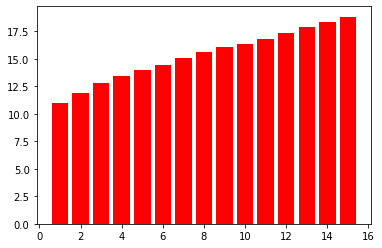

In [38]:
avg_i1=np.sum(week1i)/len(week1i)
avg_i2=np.sum(week2i)/len(week2i)
avg_i3=np.sum(week3i)/len(week3i)
avg_i4=np.sum(week4i)/len(week4i)
avg_i5=np.sum(week5i)/len(week5i)
avg_i6=np.sum(week6i)/len(week6i)
avg_i7=np.sum(week7i)/len(week7i)
avg_i8=np.sum(week8i)/len(week8i)
avg_i9=np.sum(week9i)/len(week9i)
avg_i10=np.sum(week10i)/len(week10i)
avg_i11=np.sum(week11i)/len(week11i)
avg_i12=np.sum(week12i)/len(week12i)
avg_i13=np.sum(week13i)/len(week13i)
avg_i14=np.sum(week14i)/len(week14i)
avg_i15=np.sum(week15i)/len(week15i)
avg_i=[]
avg_i.append(avg_i1)
avg_i.append(avg_i2)
avg_i.append(avg_i3)
avg_i.append(avg_i4)
avg_i.append(avg_i5)
avg_i.append(avg_i6)
avg_i.append(avg_i7)
avg_i.append(avg_i8)
avg_i.append(avg_i9)
avg_i.append(avg_i10)
avg_i.append(avg_i11)
avg_i.append(avg_i12)
avg_i.append(avg_i13)
avg_i.append(avg_i14)
avg_i.append(avg_i15)
plt.bar(time,avg_i, width=0.8, color='r')

<BarContainer object of 15 artists>

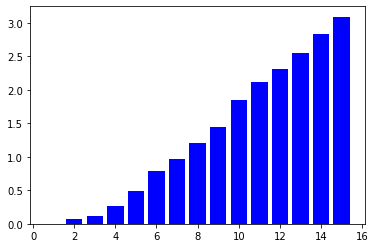

In [39]:
avg_r1=np.sum(week1r)/len(week1r)
avg_r2=np.sum(week2r)/len(week2r)
avg_r3=np.sum(week3r)/len(week3r)
avg_r4=np.sum(week4r)/len(week4r)
avg_r5=np.sum(week5r)/len(week5r)
avg_r6=np.sum(week6r)/len(week6r)
avg_r7=np.sum(week7r)/len(week7r)
avg_r8=np.sum(week8r)/len(week8r)
avg_r9=np.sum(week9r)/len(week9r)
avg_r10=np.sum(week10r)/len(week10r)
avg_r11=np.sum(week11r)/len(week11r)
avg_r12=np.sum(week12r)/len(week12r)
avg_r13=np.sum(week13r)/len(week13r)
avg_r14=np.sum(week14r)/len(week14r)
avg_r15=np.sum(week15r)/len(week15r)
avg_r=[]
avg_r.append(avg_r1)
avg_r.append(avg_r2)
avg_r.append(avg_r3)
avg_r.append(avg_r4)
avg_r.append(avg_r5)
avg_r.append(avg_r6)
avg_r.append(avg_r7)
avg_r.append(avg_r8)
avg_r.append(avg_r9)
avg_r.append(avg_r10)
avg_r.append(avg_r11)
avg_r.append(avg_r12)
avg_r.append(avg_r13)
avg_r.append(avg_r14)
avg_r.append(avg_r15)
plt.bar(time, avg_r, width=0.8, color='b')

In [ ]:
print(df)

                                          susceptible  ...                                          recovered
0   [0.0, 476.0, 489.0, 488.0, 487.0, 486.0, 485.0...  ...  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
1   [0.0, 476.0, 489.0, 488.0, 487.0, 486.0, 485.0...  ...  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
2   [0.0, 476.0, 489.0, 488.0, 487.0, 486.0, 485.0...  ...  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
3   [0.0, 476.0, 489.0, 488.0, 487.0, 486.0, 485.0...  ...  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
4   [0.0, 476.0, 489.0, 488.0, 487.0, 486.0, 485.0...  ...  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
..                                                ...  ...                                                ...
95  [0.0, 476.0, 489.0, 488.0, 487.0, 486.0, 485.0...  ...  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
96  [0.0, 476.0, 489.0, 488.0, 487.0, 486.0, 485.0...  ...  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
97  [0.0, 

In [ ]:
def simulateSIR(graph,i0,beta,rho,T) :
  n= graph.number_of_nodes()
  status=[0]*n
  week=15 
  infected=[]
  data = [ 0 ]
  infected=random.sample(list(graph.nodes),i0)
  for v in infected:
    status[v]=1
    days [ v ] = T
    data [−1] = data [−1] + 1/n
  while len(infected)>0:
    data.append(data[-1])
    new_infected=[]

    for node in infected:
      for v in list(nx.allneighbors(graph, node)):
        if (status[v]==0 and random.random()<node_link_activ_sum):
          new_infected.append(v)
          status[v]=1
        if (status[v]==1)

22 n e w i n f e c t e d . append ( v )
23 s t a t u s [ v ] = 1
24 days [ v ] = T
25 data [ −1] = data [ −1] + 1/n
26 days [ node ] = days [ node ] − 1
27 i f days [ node ] < 1 :
28 i n f e c t e d . remove ( node )
29 s t a t u s [ node ] = 2
30 i n f e c t e d = i n f e c t e d + n e w i n f e c t e d
31
32 r e t u r n data
33
34 # apply beta−g r a p h s t o an SIER d i s e a s e with exposed p e r i o d t r a n s m i s s i o n
r a t e p1 , i n f e c t i o n p e r i o d t r a n s m i s s i o n r a t e p2 , exposed p e r i o d T1 and
i n f e c t i o n p e r i o d T2 , s t a r t i n g with k i n f e c t e d i n d i v i d u a l s
35 d e f run model SEIR ( graph , k , p1 , p2 , T1 , T2) :
36 n = graph . n u m b e r o f n o d e s ( )
37
38 s t a t u s = [ 0 ] ∗ n
39 days = [ 0 ] ∗ n
40 exposed = [ ]
41 i n f e c t e d = [ ]

SyntaxError: ignored

In [ ]:
avg_s=.sum(s)/len(s)
      avg_r=np.sum(r)/len(r)
      avg_i=np.sum(inf)/len(inf)
  plt.plot(time,s, width=0.80, color="g")
  plt.plot(time,i, width=0.80, color="r")
  plt.plot(time,r, width=0.80, color="b")

In [ ]:
print(psi[,2])

1


In [ ]:
#j=1
#while (j<=15):
#  # consider the current configuration
#  x = np.array(states[j-1])
#  # define a list of admissible destination configurations, 
#  # and the rates of the corresponding transitions
#  destinations = list()
#  transition_rates = list()    
#  # admissible destinations differ from the current configuration
#  # for the state of a single agent
#  for agent in range(n_agents):
#      # compute the neighbors of the other_agent in the graph
#      neighbors = [i for i in G.neighbors(agent)]
#      infected = sum(list(filter(lambda k:k==1, x[neighbors])))  
#  
#      S = S - beta * S * infected / N
#      infected <- infected + beta * S * infected / N - gamma * I
#      R = R + gamma * infected

NameError: ignored

In [ ]:
!pip install ndlib

     |████████████████████████████████| 110 kB 15.4 MB/s 
     |████████████████████████████████| 3.1 MB 73.8 MB/s 


In [ ]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Network topology
#g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.SIRModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.3)
cfg.add_model_parameter('gamma', 0.7)
cfg.add_model_parameter("fraction_infected", 10/500)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(100)


ValueError: ignored

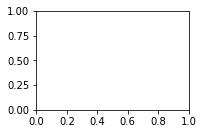

In [ ]:
ax = plt.subplot(2,2,4)
plt.bar(time, inf, width=0.80, color="b")
plt.title("infected Histogram")
plt.ylabel("infected")
plt.xlabel("Time")
plt.bar(time, r, width=0.80, color="b")
plt.title("recovered Histogram")
plt.ylabel("recovered")
plt.xlabel("Time")
plt.bar(time, s, width=0.80, color="b")
plt.title("susceptible Histogram")
plt.ylabel("susceptible")
plt.xlabel("Time")


IndexError: ignored

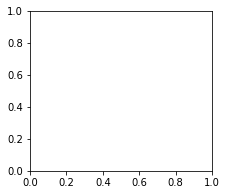

In [ ]:
pos = nx.spectral_layout(G)
fig = plt.figure(figsize=(15,10))
n_steps=15
for t in range(0,n_steps):

    plt.subplot(3,4,t+1)
    x = destinations[t]
    #x = np.array(np.unravel_index(x_id, shape = n_states))
    nx.draw_spectral(G,
        with_labels=False,
        nodelist=np.argwhere(x==0).T[0].tolist(),
        node_color = 'r')
    nx.draw_spectral(G,
        with_labels=False,
        nodelist=np.argwhere(x==1).T[0].tolist(),
        node_color = 'b')
    plt.title('jump step = {0}'.format(t+1))

In [ ]:
n_players = len(G)
# utility values
a = 1
b = 1
c = 0
d = 0
# utility matrix for the 2x2 coordination game
phi = np.array([[a,d],
                [c,b]])
# the potential function of the 2x2 coordination game
pot = np.array([[a-c,0],
                [0,b-d]])
# inverse noise parameter
eta = 2
# available actions
actions = [0,1]
n_actions = len(actions)
# adjacency matrix
W = nx.convert_matrix.to_numpy_matrix(G)

def utility(player, x, phi):
    result = 0
    for other_player in G.neighbors(player):
         result += phi[x[player], x[other_player]]
    return result

In [ ]:
# Simulation with local clocks method
# In this variant, the matrix Lambda is not precomputed
# We just compute the jump chain without taking into account the transition times, but this can be generalized as done before
n_steps=len(G)
# for each step of the simulation
for i in range(1,n_steps):
    # consider the current configuration
    x = np.unravel_index(states[i-1],shape=n_states)
    x = np.array(x)
    # define a list of admissible destination configurations, 
    # and the rates of the corresponding transitions
    destinations = list()
    transition_rates = list()
    # admissible destinations differ from the current configuration
    # for the state of a single agent
    for agent in range(n_agents):
        # construct an admissble destination and append it to the list
        y = np.array(x)
        y[agent] = 1-y[agent]
        y_id = np.ravel_multi_index(tuple(y), dims = n_states)
        destinations.append(y_id)
        # compute the transition rate from x to y
        rate = 0
        for other_agent in range(n_agents):
            # for every other_agent in the network, compute its contribution to the rate of the transition of the agent
            rate += beta*W[agent,other_agent]*phi[x[other_agent], x[agent], y[agent]]
        transition_rates.append(rate)
    # given all transition rates from x to admissible y
    # compute w_x, the clock rate of configuration x
    # Notice: transition_rates is the x-th row of Lambda
    transition_rates = np.array(transition_rates)
    w_x = np.sum(transition_rates)
    # if w_x = 0, then the process stays in x
    if w_x == 0:
        states[i] = states[i-1]
    # else, transition probabilities are computed as transition_rates/w_x
    # and the next config is chosen accordingly.
    # Notice: this is the x-th row of P
    else:
        probabilities = transition_rates / w_x
        states[i] = np.random.choice(destinations, p=probabilities)
        
# Plot the infection spread
pos = nx.spectral_layout(G)
fig = plt.figure(figsize=(15,10))
for t in range(0,n_steps):
    plt.subplot(3,4,t+1)
    x_id = states[t]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    nx.draw_spectral(G,
        with_labels=True,
        nodelist=np.argwhere(x==0).T[0].tolist(),
        node_color = 'r')
    nx.draw_spectral(G,
        with_labels=True,
        nodelist=np.argwhere(x==1).T[0].tolist(),
        node_color = 'b')
    plt.title('jump step = {0}'.format(t+1))


NameError: ignored

The epidemic is driven by the following transition probabilities
P(Xi(t + 1) = I | Xi(t) = S, ∑
j∈V
Wij δI
Xj (t) = m) = 1 − (1 − β)**m
P(Xi(t + 1) = R | Xi(t) = I) = ρ
where ∑
j∈V Wij δI
Xj (t) is the number of infected neighbors for node i.

In [ ]:
!pip install EoN

     |████████████████████████████████| 113 kB 33.4 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=dd44d3567db511dbe9f8a96e2943026ac375846572322707be0a5d0136f49a3a
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [ ]:
import EoN
gamma = 0.7
beta = 0.3 
r_0 = 10/500
print(r_0)
N = 500 # population size
I0 = 1   # intial n° of infected individuals 
R0 = 0
S0 = N - I0 -R0
#pos = nx.spring_layout(G)
nx_kwargs = {"alpha": 0.5} #optional arguments to be passed on to the
#networkx plotting command.print("doing Gillespie simulation")
sim = EoN.Gillespie_SIR(G, tau =1-(1-beta)**rho, gamma=gamma, rho = 10/500, return_full_data=True)
print("done with simulation, now plotting")
for i in range(0,15):
    sim.display(time = i,  **nx_kwargs)
    plt.axis('off') 
    plt.title("Iteration {}".format(i))
    plt.draw()

0.02


KeyError: ignored

(<matplotlib.axes._subplots.AxesSubplot at 0x7f07a0a3e6d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f07a0a00250>])

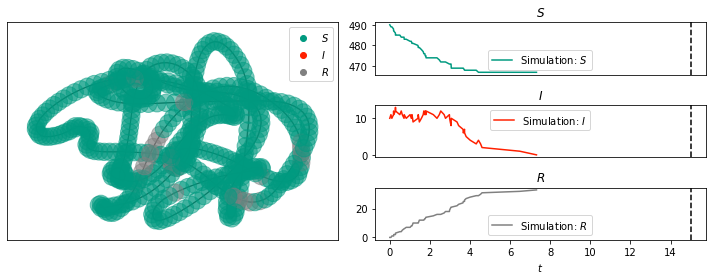

In [ ]:
sim.display(time=15, **nx_kwargs)

In [ ]:
N=500

tmax = 15
iterations = 100  #run 100 simulations
beta=0.3
gamma = 0.7    #recovery rate
rho = 10/500      #random fraction initially infected
#tau =           #transmission rate

for counter in range(iterations): #run simulations
    t, S, I, R = EoN.Gillespie_SIR(G, tau = 1 - (1-beta)**I, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'r', alpha=0.5, label='Simulation')
    plt.plot(t, I, color = 'r', alpha=0.5)
    plt.plot(t, S, color = 'g', alpha=0.5)
    plt.plot(t, R, color = 'k', alpha=0.5)

SyntaxError: ignored

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 500
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 10, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/weeks).
beta, gamma = 0.3, 0.7
# A grid of time points (in weeks)
t = np.linspace(0, 15,15)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = 1−(1 − beta)**I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/500, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/500, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/500, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /weeks')
ax.set_ylabel('Number')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
print(S,I,R)

SyntaxError: ignored

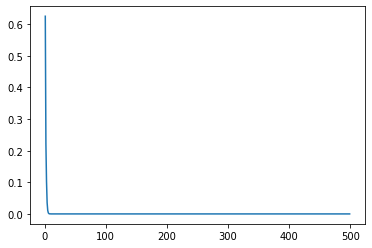

In [ ]:
p = np.zeros(n+1)

p[0] = 0
p[1] = 1/(2*beta+1)

for i in range(2,n):
    p[i] = (i-1)*(2*beta)/(2*beta+1)*(beta/(beta+1))**(i-2)/(beta+1)**2
    
p[n] = (2*beta)/(2*beta+1) * ((n-2)*(beta/(beta+1))**(n-2)/(beta+1)+(beta/(beta+1))**(n-2))

x = range(n+1)

plt.plot(x[1:n+1],p[1:n+1])
plt.show()

In [ ]:
import networkx as nx
import random
import heapq
import numpy as np
import EoN
from collections import defaultdict
from collections import Counter



def _truncated_exponential_(rate, T):
    r'''returns a number between 0 and T from an
    exponential distribution conditional on the outcome being between 0 and T'''
    t = random.expovariate(rate)
    L = int(t/T)
    return t - L*T
   
class myQueue(object):
    r'''
    This class is used to store and act on a priority queue of events for 
    event-driven simulations.  It is based on heapq.
    Each queue is given a tmax (default is infinity) so that any event at later 
    time is ignored.
    
    This is a priority queue of 4-tuples of the form 
                   ``(t, counter, function, function_arguments)``
    The ``'counter'`` is present just to break ties, which generally only occur when 
    multiple events are put in place for the initial condition, but could also 
    occur in cases where events tend to happen at discrete times.
    note that the function is understood to have its first argument be t, and 
    the tuple ``function_arguments`` does not include this first t.
    So function is called as 
        ``function(t, *function_arguments)``
    Previously I used a class of events, but sorting using the __lt__ function 
    I wrote was significantly slower than simply using tuples.
    '''
    def __init__(self, tmax=float("Inf")):
        self._Q_ = []
        self.tmax=tmax
        self.counter = 0 #tie-breaker for putting things in priority queue
    def add(self, time, function, args = ()):
        r'''time is the time of the event.  args are the arguments of the
        function not including the first argument which must be time'''
        if time<self.tmax:   
            heapq.heappush(self._Q_, (time, self.counter, function, args))
            self.counter += 1
    def pop_and_run(self):
        r'''Pops the next event off the queue and performs the function'''
        t, counter, function, args = heapq.heappop(self._Q_)
        function(t, *args)
    def __len__(self): 
        r'''this will allow us to use commands like ``while Q:`` '''
        return len(self._Q_)
        

class _ListDict_(object):
    r'''
    The Gillespie algorithm will involve a step that samples a random element 
    from a set based on its weight.  This is awkward in Python.
    
    So I'm introducing a new class based on a stack overflow answer by
    Amber (http://stackoverflow.com/users/148870/amber) 
    for a question by
    tba (http://stackoverflow.com/users/46521/tba) 
    found at
    http://stackoverflow.com/a/15993515/2966723
    
    This will allow me to select a random element uniformly, and then use 
    rejection sampling to make sure it's been selected with the appropriate 
    weight.
    '''
    def __init__(self, weighted = False):
        self.item_to_position = {}
        self.items = []

        self.weighted = weighted
        if self.weighted:
            self.weight = defaultdict(int) #presume all weights positive
            self.max_weight = 0
            self._total_weight = 0
            self.max_weight_count = 0
            

    def __len__(self):
        return len(self.items)

    def __contains__(self, item):
        return item in self.item_to_position

    def _update_max_weight(self):
        C = Counter(self.weight.values())  #may be a faster way to do this, we only need to count the max.
        self.max_weight = max(C.keys())
        self.max_weight_count = C[self.max_weight]

        
    def insert(self, item, weight = None):
        r'''
        If not present, then inserts the thing (with weight if appropriate)
        if already there, replaces the weight unless weight is 0
        
        If weight is 0, then it removes the item and doesn't replace.
        
        WARNING:
            replaces weight if already present, does not increment weight.
            
        
        '''
        if self.__contains__(item):
            self.remove(item)
        if weight != 0:
            self.update(item, weight_increment=weight)
        

    def update(self, item, weight_increment = None):
        r'''
        If not present, then inserts the thing (with weight if appropriate)
        if already there, increments weight
        
        WARNING:
            increments weight if already present, cannot overwrite weight.
        '''
        if weight_increment is not None: #will break if passing a weight to unweighted case
            if weight_increment >0 or self.weight[item] != self.max_weight:
                self.weight[item] = self.weight[item] + weight_increment
                self._total_weight += weight_increment
                if self.weight[item] > self.max_weight:
                    self.max_weight_count = 1
                    self.max_weight = self.weight[item]
                elif self.weight[item] == self.max_weight:
                    self.max_weight_count += 1
            else: #it's a negative increment and was at max
                self.max_weight_count -= 1
                self.weight[item] = self.weight[item] + weight_increment
                self._total_weight += weight_increment
                self.max_weight_count -= 1 
                if self.max_weight_count == 0:
                    self._update_max_weight               
        elif self.weighted:
            raise Exception('if weighted, must assign weight_increment')

        if item in self: #we've already got it, do nothing else
            return
        self.items.append(item)
        self.item_to_position[item] = len(self.items)-1

    def remove(self, choice):
        position = self.item_to_position.pop(choice)
        last_item = self.items.pop()
        if position != len(self.items):
            self.items[position] = last_item
            self.item_to_position[last_item] = position
            
        if self.weighted:
            weight = self.weight.pop(choice)
            self._total_weight -= weight
            if weight == self.max_weight:  
                #if we find ourselves in this case often
                #it may be better just to let max_weight be the
                #largest weight *ever* encountered, even if all remaining weights are less
                #
                self.max_weight_count -= 1
                if self.max_weight_count == 0 and len(self)>0:
                    self._update_max_weight()

    def choose_random(self):
        # r'''chooses a random node.  If there is a weight, it will use rejection
        # sampling to choose a random node until it succeeds'''
        if self.weighted:
            while True:
                choice = random.choice(self.items)
                if random.random() < self.weight[choice]/self.max_weight:
                    break
            # r = random.random()*self.total_weight
            # for item in self.items:
            #     r-= self.weight[item]
            #     if r<0:
            #         break
            return choice

        else:
            return random.choice(self.items)
        

    def random_removal(self):
        r'''uses other class methods to choose and then remove a random node'''
        choice = self.choose_random()
        self.remove(choice)
        return choice

    def total_weight(self):
        if self.weighted:
            return self._total_weight
        else:
            return len(self)
    def update_total_weight(self):
        self._total_weight = sum(self.weight[item] for item in self.items)


In [ ]:
def _transform_to_node_history_(infection_times, recovery_times, tmin, SIR = True):
    r'''The original (v0.96 and earlier) returned infection_times and recovery_times.
    The new version returns node_history instead. This code transforms
    the former to the latter.
    
    It is only used for the continuous time cases.
    '''
    if SIR:
        node_history = defaultdict(lambda : ([tmin], ['S']))
        for node, time in infection_times.items():
            if time == tmin:
                node_history[node] = ([], [])
            node_history[node][0].append(time)
            node_history[node][1].append('I')
        for node, time in recovery_times.items():
            if time == tmin:
                node_history[node] = ([], [])
            node_history[node][0].append(time)
            node_history[node][1].append('R')        
    else:
        node_history = defaultdict(lambda : ([tmin], ['S']))
        for node, Itimes in infection_times.items():
            Rtimes = recovery_times[node]
            while Itimes:
                time = Itimes.pop(0)
                if time == tmin:
                    node_history[node] = ([], [])
                node_history[node][0].append(time)
                node_history[node][1].append('I')
                if Rtimes:
                    time = Rtimes.pop(0)
                    node_history[node][0].append(time)
                    node_history[node][1].append('S')
        
    return node_history
    print(node_history)

In [ ]:
node=_transform_to_node_history_(recovery_times, tmin, SIR = True)

NameError: ignored

In [ ]:
def _simple_test_transmission_(u, v, p):
    r
    p=0.3
    '''
    A simple test for whether u transmits to v assuming constant probability p
    
    From figure 6.8 of Kiss, Miller, & Simon.  Please cite the book if 
    using this test_transmission function for basic_discrete_SIR.
    This handles the simple case where transmission occurs with 
    probability p.
    :Arguments:
        u (node)
            the infected node
        v : node
            the susceptible node
        p : number between 0 and 1
            the transmission probability
    :Returns:
        
    
            
            True if u will infect v (given opportunity)
            False otherwise
    '''

    return random.random()<p

In [ ]:

def discrete_SIR(G, test_transmission=_simple_test_transmission_, args=(), 
                initial_infecteds=None, initial_recovereds = None, 
                rho = None, tmin = 0, tmax = float('Inf'),
                return_full_data = False, sim_kwargs = None):
    #tested in test_discrete_SIR
    r'''
    Simulates an SIR epidemic on G in discrete time, allowing user-specified transmission rules
    
    From figure 6.8 of Kiss, Miller, & Simon.  Please cite the book
    if using this algorithm.
    Return details of epidemic curve from a discrete time simulation.
    
    It assumes that individuals are infected for exactly one unit of 
    time and then recover with immunity.
    This is defined to handle a user-defined function
    ``test_transmission(node1,node2,*args)``
    which determines whether transmission occurs.
    So elaborate rules can be created as desired by the user.
    By default it uses 
    ``_simple_test_transmission_``
    in which case args should be entered as (p,)
    :Arguments: 
    **G** NetworkX Graph (or some other structure which quacks like a 
                           NetworkX Graph)
        The network on which the epidemic will be simulated.
        
    **test_transmission** function(u,v,*args)
        (see below for args definition)
        A function that determines whether u transmits to v.
        It returns True if transmission happens and False otherwise.
        The default will return True with probability p, where args=(p,)
        This function can be user-defined.
        It is called like:
        test_transmission(u,v,*args)
        Note that if args is not entered, then args=(), and this call is 
        equivalent to
        test_transmission(u,v)
    **args** a list or tuple
        The arguments of test_transmission coming after the nodes.  If 
        simply having transmission with probability p it should be 
        entered as 
        args=(p,)
            
        [note the comma is needed to tell Python that this is really a 
        tuple]
    **initial_infecteds** node or iterable of nodes (default None)
        if a single node, then this node is initially infected
        if an iterable, then whole set is initially infected
        if None, then choose randomly based on rho.  If rho is also
        None, a random single node is chosen.
        If both initial_infecteds and rho are assigned, then there
        is an error.
       
    **initial_recovereds** as for initial_infecteds, but initially 
            recovered nodes.
            
    **rho** number  (default is None)
        initial fraction infected. initial number infected 
        is int(round(G.order()*rho)).
        
        The default results in a single randomly chosen initial infection.
    **tmin** start time
        
    **tmax** stop time (default Infinity). 
    **return_full_data** boolean (default False)
        Tells whether a Simulation_Investigation object should be returned.  
    **sim_kwargs** keyword arguments
        Any keyword arguments to be sent to the Simulation_Investigation object
        Only relevant if ``return_full_data=True``
            
    :Returns: 
        
        
    **t, S, I, R** numpy arrays
            
    Or ``if return_full_data is True`` returns
    
    **full_data**  Simulation_Investigation object
        from this we can extract the status history of all nodes
        We can also plot the network at given times
        and even create animations using class methods.
    
    :SAMPLE USE:
    ::
        import networkx as nx
        import EoN
        import matplotlib.pyplot as plt
        G = nx.fast_gnp_random_graph(1000,0.002)
        t, S, I, R = EoN.discrete_SIR(G, args = (0.6,), 
                                            initial_infecteds=range(20))
        plt.plot(t,I)
    
    
    Because this sample uses the defaults, it is equivalent to a call to 
    basic_discrete_SIR
    '''
    if rho is not None and initial_infecteds is not None:
        raise EoN.EoNError("cannot define both initial_infecteds and rho")

    
    
    if initial_infecteds is None:  #create initial infecteds list if not given
        if rho is None:
            initial_number = 1
        else:
            initial_number = int(round(G.order()*rho))
        initial_infecteds=random.sample(G.nodes(), initial_number)
    elif G.has_node(initial_infecteds):
        initial_infecteds=[initial_infecteds]
    #else it is assumed to be a list of nodes.

    if return_full_data:
        node_history = defaultdict(lambda : ([tmin], ['S']))
        transmissions = []
        for node in initial_infecteds:
            node_history[node] = ([tmin], ['I'])
            transmissions.append((tmin-1, None, node))
        if initial_recovereds is not None:
            for node in initial_recovereds:
                node_history[node] = ([tmin], ['R'])
    
    N=G.order()
    t = [tmin]
    S = [N-len(initial_infecteds)]
    I = [len(initial_infecteds)]
    R = [0]
    
    susceptible = defaultdict(lambda: True)  
    #above line is equivalent to u.susceptible=True for all nodes.
    
    for u in initial_infecteds:
        susceptible[u] = False
    if initial_recovereds is not None:
        for u in initial_recovereds:
            susceptible[u] = False
        
    infecteds = set(initial_infecteds)
    
    while infecteds and t[-1]<tmax:
        new_infecteds = set()
        
        infector = {}  #used for returning full data.  a waste of time otherwise
        for u in infecteds:
            for v in G.neighbors(u):
                if susceptible[v] and test_transmission(u, v, *args): 
                    new_infecteds.add(v)
                    susceptible[v] = False
                    infector[v] = [u]
                elif return_full_data and v in new_infecteds and test_transmission(u, v, *args):
                    #if ``v`` already infected on this round, consider if it is
                    #multiply infected this round.
                    infector[v].append(u)
                    

        if return_full_data:
            for v in infector.keys():
                transmissions.append((t[-1], random.choice(infector[v]), v))
            next_time = t[-1]+1
            if next_time <= tmax:
                for u in infecteds:
                    node_history[u][0].append(next_time)
                    node_history[u][1].append('R')
                for v in new_infecteds:
                    node_history[v][0].append(next_time)
                    node_history[v][1].append('I')

        infecteds = new_infecteds

        R.append(R[-1]+I[-1])
        I.append(len(infecteds))
        S.append(S[-1]-I[-1])
        t.append(t[-1]+1)
    if not return_full_data:
        return np.array(t), np.array(S), np.array(I), \
               np.array(R)
    else:
        if sim_kwargs is None:
            sim_kwargs = {}
        return EoN.Simulation_Investigation(G, node_history, transmissions, 
                                            possible_statuses = ['S', 'I', 'R'], 
                                            **sim_kwargs)

In [ ]:
def basic_discrete_SIR(G, p, initial_infecteds=None, 
                                initial_recovereds = None, rho = None,
                                tmin = 0, tmax=float('Inf'), 
                                return_full_data = False, sim_kwargs = None):
    #tested in test_basic_discrete_SIR   
    r'''
    Performs simple discrete SIR simulation assuming constant transmission 
    probability p.
    
    From figure 6.8 of Kiss, Miller, & Simon.  Please cite the book if 
    using this algorithm.
    Does a simulation of the simple case of all nodes transmitting
    with probability p independently to each neighbor and then
    recovering.
    :Arguments: 
    **G**    networkx Graph
            The network the disease will transmit through.
            
    **p** number
            transmission probability
            
    **initial_infecteds**  node or iterable of nodes (default None)
            if a single node, then this node is initially infected
            if an iterable, then whole set is initially infected
            if None, then choose randomly based on rho.  If rho is also
            None, a random single node is chosen.
            If both initial_infecteds and rho are assigned, then there
            is an error.
       
    **initial_recovereds**  as for initial_infecteds, but for initially 
            recovered nodes.
            
    **rho**  number  (default None)
            initial fraction infected. number initially infected
            is int(round(G.order()*rho))
            
            The default results in a single randomly chosen initial infection.
        
    **tmin**  float  (default 0)
        start time
        
    **tmax**  float  (default infinity)
        stop time (if not extinct first).  
    **return_full_data**  boolean (default False)
        Tells whether a Simulation_Investigation object should be returned.  
    **sim_kwargs** keyword arguments
        Any keyword arguments to be sent to the Simulation_Investigation object
        Only relevant if ``return_full_data=True``
    :Returns: 
        
    if return_full_data is False returns 
        
        **t, S, I, R**    numpy arrays
        
        these numpy arrays give all the times observed and the number 
        in each state at each time.
            
    Or ``if return_full_data is True`` returns
        **full_data**  Simulation_Investigation object
            
        from this we can extract the status history of all nodes
        We can also plot the network at given times
        and even create animations using class methods.
    
    :SAMPLE USE:
    ::
        import networkx as nx
        import EoN
        import matplotlib.pyplot as plt
        G = nx.fast_gnp_random_graph(1000,0.002)
        t, S, I, R = EoN.basic_discrete_SIR(G, 0.6)
        plt.plot(t,S)
    
    
        #This sample may be boring if the randomly chosen initial infection
        #doesn't trigger an epidemic.
'''

    return discrete_SIR(G, _simple_test_transmission_, (p,), 
                                    initial_infecteds, initial_recovereds, 
                                    rho, tmin, tmax, return_full_data, sim_kwargs=sim_kwargs)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
taxis,xaxis,yaxis,zaxis = [],[],[],[]
N = 500
y = 10
x = N-y
z = 0
N1 = x
beta = 0.3
gamma = 0.7
du = -0.0001
u = 1.0
t_sum = 0
t = 0
while y > 0:
# print(f’{t:.2f}’,f’{x:.1f}’,f’{y:.1f}’,f’{z:.1f}’)
  taxis.append(t)
  xaxis.append(x)
  yaxis.append(y)
  zaxis.append(z)
  u += du
  x = N1 * u
  y = - x + gamma/beta*N*np.log(u) + N
  z = N - x - y
  dt = -N/(u*beta*y)
  t_sum += dt
  t = t_sum*du

  plt.xlim(0,70)

 # plt.text(62,2600,’$\gamma=$’+str(gamma), fontsize=10)
 # plt.text(62,3200,’$\\beta=$’+str(beta), fontsize=10)
  plt.grid(True)
  plt.plot(taxis, xaxis, color='g', linewidth=1.0, label=’S’)
  plt.plot(taxis, yaxis, color='r', linewidth=1.0, label=’I’)
  plt.plot(taxis, zaxis, color='b', linewidth=1.0, label=’R’)

  #plt.savefig(’SIR_exact.eps’)
  plt.show()

SyntaxError: ignored

# 1.2

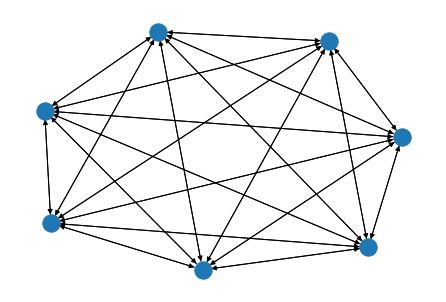

In [ ]:
G = nx.DiGraph()
G=nx.complete_graph(7, nx.DiGraph())

nx.draw(G)

In [ ]:
import scipy.io as sio
import networkx as nx
import numpy as np
import scipy as sp
import collections 
import matplotlib.pyplot as plt

k=6

initial_nodes=k+1

G = nx.DiGraph()
G=nx.complete_graph(initial_nodes, nx.DiGraph())




degr=np.ones(900)*k
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)

# count for each out-degree value, how many nodes have that out-degree
# degreeCount is a list of tuples (degree value, number of nodes)
degreeCount = collections.Counter(degr)#number of nodes with each degree
# zip() returns an iterator of tuples where the first item in each passed tuple 
# is paired together, the second item in each passed tuple are paired together
# and so on.
# In this way we obtain deg, which is the tuple of degree values, and
# cnt which is the tuple of the counts.
#print(degreeCount)
deg, cnt = zip(*degreeCount.items())
deg_distr = np.array(cnt)/sum(cnt)

# set a, the intrinsic probability of a node to be selected as a neighbor 
# from new nodes
a = 1

# add the remaining nodes one at a time
for node in range(initial_nodes,900):
    # compute degree of new node according to deg_distr (degree distribution
    # of the real citation graph).
    # the min guarantees that the new node is not assigned a degree
    # larger than the current size of GPA
    degree = k
    # choose `degree` neighbors for node to connect to according to their 
    # in-degree in the current approximation G.
    # compute updated in degree sequence
    in_deg_PA = [d for n, d in G.in_degree()] 
    # add a so that also node with 0 in-degree have non-zero probability
    # of being chosen
    in_deg_PA = np.array(in_deg_PA)+a 
    # normalize to obtain a probability distribution
    in_deg_PA = in_deg_PA/sum(in_deg_PA)
    # replace=False guarantees no neighbor is chosen twice
    b=np.arange(len(G))
    neighbors = np.random.choice(b, p=in_deg_PA, size=degree, replace=False)
    # add the new node (new node is added even if its out-degree is zero)
    G.add_node(node)
    # add the new links 
    for neigh in neighbors:
        G.add_edge(node,neigh)
    degr[node]=degree 


print(np.sum(degr)/G.number_of_nodes())
 
#nx.draw(G, with_labels=True)

6.0


# 2

In [ ]:
import scipy.io as sio
import networkx as nx
import numpy as np
import scipy as sp
import collections 
import matplotlib.pyplot as plt
# S=0, I=1, R=2


# Mutation kernel
psi = np.array([[1,0,0],
                [0,0,1],
                [0,0,1]])

# Nodes activation rate rho
rho = 0.7

# Pairwise interaction kernels
# 3-dimensional array
phi = np.array([[[1,0,0],
                 [0,1,0],
                 [0,0,1]], 
                [[0,1,0],
                 [0,1,0],
                 [0,0,1]],
                [[1,0,0],
                 [0,1,0],
                 [0,0,1]]])

# Links activation rate beta
beta = 0.3

# Initialize the time
time = np.zeros(15)
t_next = 0
week1s=np.zeros(100)
week2s=np.zeros(100)
week3s=np.zeros(100)
week4s=np.zeros(100)
week5s=np.zeros(100)
week6s=np.zeros(100)
week7s=np.zeros(100)
week8s=np.zeros(100)
week9s=np.zeros(100)
week10s=np.zeros(100)
week11s=np.zeros(100)
week12s=np.zeros(100)
week13s=np.zeros(100)
week14s=np.zeros(100)
week15s=np.zeros(100)
week1r=np.zeros(100)
week2r=np.zeros(100)
week3r=np.zeros(100)
week4r=np.zeros(100)
week5r=np.zeros(100)
week6r=np.zeros(100)
week7r=np.zeros(100)
week8r=np.zeros(100)
week9r=np.zeros(100)
week10r=np.zeros(100)
week11r=np.zeros(100)
week12r=np.zeros(100)
week13r=np.zeros(100)
week14r=np.zeros(100)
week15r=np.zeros(100)
week1i=np.zeros(100)
week2i=np.zeros(100)
week3i=np.zeros(100)
week4i=np.zeros(100)
week5i=np.zeros(100)
week6i=np.zeros(100)
week7i=np.zeros(100)
week8i=np.zeros(100)
week9i=np.zeros(100)
week10i=np.zeros(100)
week11i=np.zeros(100)
week12i=np.zeros(100)
week13i=np.zeros(100)
week14i=np.zeros(100)
week15i=np.zeros(100)

for i in range(100): 
  k=6
  initial_nodes=k+1
  G = nx.DiGraph()
  G=nx.complete_graph(initial_nodes, nx.DiGraph())


  degr=np.ones(500)*k
  degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)

  # count for each out-degree value, how many nodes have that out-degree
  # degreeCount is a list of tuples (degree value, number of nodes)
  degreeCount = collections.Counter(degr)#number of nodes with each degree
  # zip() returns an iterator of tuples where the first item in each passed tuple 
  # is paired together, the second item in each passed tuple are paired together
  # and so on.
  # In this way we obtain deg, which is the tuple of degree values, and
  # cnt which is the tuple of the counts.
  #print(degreeCount)
  deg, cnt = zip(*degreeCount.items())
  deg_distr = np.array(cnt)/sum(cnt)

  # set a, the intrinsic probability of a node to be selected as a neighbor 
  # from new nodes
  a = 1

  # add the remaining nodes one at a time
  for node in range(initial_nodes,500):
      # compute degree of new node according to deg_distr (degree distribution
      # of the real citation graph).
      # the min guarantees that the new node is not assigned a degree
      # larger than the current size of GPA
      degree = k
      # choose `degree` neighbors for node to connect to according to their 
      # in-degree in the current approximation G.
      # compute updated in degree sequence
      in_deg_PA = [d for n, d in G.in_degree()] 
      # add a so that also node with 0 in-degree have non-zero probability
      # of being chosen
      in_deg_PA = np.array(in_deg_PA)+a 
      # normalize to obtain a probability distribution
      in_deg_PA = in_deg_PA/sum(in_deg_PA)
      # replace=False guarantees no neighbor is chosen twice
      b=np.arange(len(G))
      neighbors = np.random.choice(b, p=in_deg_PA, size=degree, replace=False)
      # add the new node (new node is added even if its out-degree is zero)
      G.add_node(node)
      # add the new links 
      for neigh in neighbors:
          G.add_edge(node,neigh)
      degr[node]=degree 

  # Adjacency matrix, interactions are encoded in the graph.
  W = nx.convert_matrix.to_numpy_matrix(G)
  n_agents = len(G)

  # Number of states for each agent
  n_states = tuple(3 for _ in range(n_agents))


  #inizialize the variables
  new_i=np.zeros(15)
  s=np.zeros(15)
  inf=np.zeros(15)
  r=np.zeros(15)
  lst1=[]
  lst2=[]
  lst3=[]
  # store the ids of visited configurations, describing the state of each agent
  states = list()
  # in the initial configuration, agent 0 is infected
  x0 = np.zeros(n_agents, dtype=int)
  x0[4] = 1
  x0[7] = 1
  x0[3] = 1
  x0[8] = 1
  x0[9] = 1
  x0[1] = 1
  x0[40] = 1
  x0[30] = 1
  x0[76] = 1
  x0[45] = 1

  x0 = tuple(x0)

  # define initial state (time 0)
  states.append(tuple(x0))


  j=1
  for j in range(15):
      # consider the current configuration
      x = np.array(states[j-1])
      # define a list of admissible destination configurations, 
      # and the rates of the corresponding transitions
      destinations = list()
      transition_rates = list()    
      # admissible destinations differ from the current configuration
      # for the state of a single agent
      for agent in range(n_agents):
          # compute the neighbors of the other_agent in the graph
          neighbors = [i for i in G.neighbors(agent)]
          infected = sum(list(filter(lambda k:k==1, x[neighbors])))
          phi_xy = 1 - (1-beta)**infected
          # construct an admissible destination and append it to the list
          y = np.array(x)
          y[agent] = 1-y[agent]
          y_id = tuple(y)
          destinations.append(y_id)
          # compute the transition rate from x to y
          rate = 0
          for other_agent in range(n_agents):
              # for every other_agent in the network, 
              # compute its contribution to the rate of the transition of the agent
              rate += psi[x[agent],y[agent]]*rho + beta*W[agent,other_agent]*phi[x[other_agent], x[agent], y[agent]]*phi_xy
          transition_rates.append(rate) 
      # given all transition rates from x to admissible y
      # compute w_x, the clock rate of configuration x
      # Notice: transition_rates is the x-th row of Lambda
      transition_rates = np.array(transition_rates)
      w_x = np.sum(transition_rates)
      # probabilities of transitioning to each admissible configuration y
      probabilities = transition_rates / w_x
      # next state is chosen at random from the possible destination 
      # with the probability distribution probabilities
      index_destin = np.arange(len(destinations))
      index_destin = np.random.choice(index_destin, p=probabilities)
      states.append(destinations[index_destin])
      node_link_activ= np.argwhere(node_link_activ_sum>np.random.rand())[0][0]

      #for agent in range(n_agents):
      agent_index=destinations[index_destin][0]
      actual_status=x[agent_index]
      if actual_status == 2:
          new_status=actual_status
      else:
        if (node_link_activ==0 or w_x==0):
          new_status=actual_status
        if (node_link_activ==1):
          new_status=psi[actual_status,:].tolist().index(1)
          #print(new_status)
      x[agent_index]=new_status
      #print(x)
      
      states[0]=x

      
      time[j]=j
      #print(node_link_activ)
      #if w_x == 0:
       # states[i] = states[i-1]
       ## else, transition probabilities are computed as transition_rates/w_x
       ## and the next config is chosen accordingly.
       ## Notice: this is the x-th row of P
      #else:
       # states[i] = np.random.choice(destinations, probabilities)
      t_next += -np.log(np.random.rand())/w_x
      
      s[j]=len(np.argwhere(x==0))
      inf[j]=len(np.argwhere(x==1))
      r[j]=len(np.argwhere(x==2))

      if(j==0):
        week1s[i]=s[j]
        week1i[i]=inf[j]
        week1r[i]=r[j]
      if(j==1):
        week2s[i]=(s[j])
        week2i[i]=(inf[j])
        week2r[i]=(r[j])
      if(j==2):
        week3s[i]=(s[j])
        week3i[i]=(inf[j])
        week3r[i]=(r[j])
      if(j==3):
        week4s[i]=(s[j])
        week4i[i]=(inf[j])
        week4r[i]=(r[j])
      if(j==4):
        week5s[i]=(s[j])
        week5i[i]=(inf[j])
        week5r[i]=(r[j])
      if(j==5):
        week6s[i]=(s[j])
        week6i[i]=(inf[j])
        week6r[i]=(r[j])
      if(j==6):
        week7s[i]=(s[j])
        week7i[i]=(inf[j])
        week7r[i]=(r[j])
      if(j==7):
        week8s[i]=(s[j])
        week8i[i]=(inf[j])
        week8r[i]=(r[j])
      if(j==8):
        week9s[i]=(s[j])
        week9i[i]=(inf[j])
        week9r[i]=(r[j])
      if(j==9):
        week10s[i]=(s[j])
        week10i[i]=(inf[j])
        week10r[i]=(r[j])
      if(j==10):
        week11s[i]=(s[j])
        week11i[i]=(inf[j])
        week11r[i]=(r[j])        
      if(j==11):
        week12s[i]=(s[j])
        week12i[i]=(inf[j])
        week12r[i]=(r[j])
      if(j==12):
        week13s[i]=(s[j])
        week13i[i]=(inf[j])
        week13r[i]=(r[j])
      if(j==13):
        week14s[i]=(s[j])
        week14i[i]=(inf[j])
        week14r[i]=(r[j])
      if(j==14):
        week15s[i]=(s[j])
        week15i[i]=(inf[j])
        week15r[i]=(r[j])

      new_i[j]=(inf[j]-inf[j-1])
  print(new_i)
  plt.plot(new_i)






[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[11.  1.

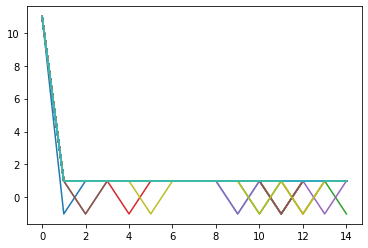

In [74]:
# Number of agents, the number of nodes in the graph
n_agents = len(G)

# S=0, I=1, R=2

# Mutation kernel
psi = np.array([[1,0,0],
                [0,0,1],
                [0,0,1]])

# Nodes activation rate rho
rho = 0.7

# Pairwise interaction kernels
# 3-dimensional array
phi = np.array([[[1,0,0],
                 [0,1,0],
                 [0,0,1]], 
                [[0,1,0],
                 [0,1,0],
                 [0,0,1]],
                [[1,0,0],
                 [0,1,0],
                 [0,0,1]]])

# Links activation rate beta
beta = 0.3

# Adjacency matrix, interactions are encoded in the graph.
W = nx.convert_matrix.to_numpy_matrix(G)

# Number of states for each agent
n_states = tuple(3 for _ in range(n_agents))

# Initialize the time
time = np.zeros(15)
t_next = 0
week1s=np.zeros(100)
week2s=np.zeros(100)
week3s=np.zeros(100)
week4s=np.zeros(100)
week5s=np.zeros(100)
week6s=np.zeros(100)
week7s=np.zeros(100)
week8s=np.zeros(100)
week9s=np.zeros(100)
week10s=np.zeros(100)
week11s=np.zeros(100)
week12s=np.zeros(100)
week13s=np.zeros(100)
week14s=np.zeros(100)
week15s=np.zeros(100)
week1r=np.zeros(100)
week2r=np.zeros(100)
week3r=np.zeros(100)
week4r=np.zeros(100)
week5r=np.zeros(100)
week6r=np.zeros(100)
week7r=np.zeros(100)
week8r=np.zeros(100)
week9r=np.zeros(100)
week10r=np.zeros(100)
week11r=np.zeros(100)
week12r=np.zeros(100)
week13r=np.zeros(100)
week14r=np.zeros(100)
week15r=np.zeros(100)
week1i=np.zeros(100)
week2i=np.zeros(100)
week3i=np.zeros(100)
week4i=np.zeros(100)
week5i=np.zeros(100)
week6i=np.zeros(100)
week7i=np.zeros(100)
week8i=np.zeros(100)
week9i=np.zeros(100)
week10i=np.zeros(100)
week11i=np.zeros(100)
week12i=np.zeros(100)
week13i=np.zeros(100)
week14i=np.zeros(100)
week15i=np.zeros(100)

for i in range(100):

  k=6
  initial_nodes=k+1
  G = nx.DiGraph()
  G=nx.complete_graph(initial_nodes, nx.DiGraph())


  degr=np.ones(500)*k
  degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)

  # count for each out-degree value, how many nodes have that out-degree
  # degreeCount is a list of tuples (degree value, number of nodes)
  degreeCount = collections.Counter(degr)#number of nodes with each degree
  # zip() returns an iterator of tuples where the first item in each passed tuple 
  # is paired together, the second item in each passed tuple are paired together
  # and so on.
  # In this way we obtain deg, which is the tuple of degree values, and
  # cnt which is the tuple of the counts.
  #print(degreeCount)
  deg, cnt = zip(*degreeCount.items())
  deg_distr = np.array(cnt)/sum(cnt)

  # set a, the intrinsic probability of a node to be selected as a neighbor 
  # from new nodes
  a = 1
  # add the remaining nodes one at a time
  for node in range(initial_nodes,500):
      # compute degree of new node according to deg_distr (degree distribution
      # of the real citation graph).
      # the min guarantees that the new node is not assigned a degree
      # larger than the current size of GPA
      degree = k
      # choose `degree` neighbors for node to connect to according to their 
      # in-degree in the current approximation G.
      # compute updated in degree sequence
      in_deg_PA = [d for n, d in G.in_degree()] 
      # add a so that also node with 0 in-degree have non-zero probability
      # of being chosen
      in_deg_PA = np.array(in_deg_PA)+a 
      # normalize to obtain a probability distribution
      in_deg_PA = in_deg_PA/sum(in_deg_PA)
      # replace=False guarantees no neighbor is chosen twice
      b=np.arange(len(G))
      neighbors = np.random.choice(b, p=in_deg_PA, size=degree, replace=False)
      # add the new node (new node is added even if its out-degree is zero)
      G.add_node(node)

      # add the new links 
      for neigh in neighbors:
          G.add_edge(node,neigh)
      degr[node]=degree 

  #inizialize the variables
  new_i=np.zeros(15)
  s=np.zeros(15)
  inf=np.zeros(15)
  r=np.zeros(15)
  lst1=[]
  lst2=[]
  lst3=[]
  # store the ids of visited configurations, describing the state of each agent
  states = list()
  # in the initial configuration, agent 0 is infected
  x0 = np.zeros(n_agents, dtype=int)
  x0[4] = 1
  x0[7] = 1
  x0[3] = 1
  x0[8] = 1
  x0[9] = 1
  x0[1] = 1
  x0[40] = 1
  x0[30] = 1
  x0[76] = 1
  x0[45] = 1
  
  #x0 = tuple(x0)

  # define initial state (time 0)
  states.append(tuple(x0))

  j=1
  for j in range(15):
      # consider the current configuration
      x = np.array(states[j-1])
      # define a list of admissible destination configurations, 
      # and the rates of the corresponding transitions
      destinations = list()
      transition_rates = list()    
      # admissible destinations differ from the current configuration
      # for the state of a single agent
      for agent in range(n_agents):
          # compute the neighbors of the other_agent in the graph
          neighbors = [i for i in G.neighbors(agent)]
          infected = sum(list(filter(lambda k:k==1, x[neighbors])))
          phi_xy = 1 - (1-beta)**infected
          # construct an admissible destination and append it to the list
          y = np.array(x)
          y[agent] = 1-y[agent]
          y_id = tuple(y)
          destinations.append(y_id)
          # compute the transition rate from x to y
          rate = 0
          for other_agent in range(n_agents):
              # for every other_agent in the network, 
              # compute its contribution to the rate of the transition of the agent
              rate += psi[x[agent],y[agent]]*rho + beta*W[agent,other_agent]*phi[x[other_agent], x[agent], y[agent]]*phi_xy
          transition_rates.append(rate) 
      # given all transition rates from x to admissible y
      # compute w_x, the clock rate of configuration x
      # Notice: transition_rates is the x-th row of Lambda
      transition_rates = np.array(transition_rates)
      w_x = np.sum(transition_rates)
      # probabilities of transitioning to each admissible configuration y
      probabilities = transition_rates / w_x
      # next state is chosen at random from the possible destination 
      # with the probability distribution probabilities
      index_destin = np.arange(len(destinations))
      index_destin = np.random.choice(index_destin, p=probabilities)
      states.append(destinations[index_destin])
      node_link_activ=(node_link_activ_sum>np.random.rand())[1]
      

      #for agent in range(n_agents):
      agent_index=destinations[index_destin][0]
      actual_status=x[agent_index]
      if x0[index_destin] == 2:
          new_status=x0[index_destin]
      else:
        if (node_link_activ==0 or w_x==0):
          new_status=x0[index_destin]
        if (node_link_activ==1):
          new_status=x0[index_destin]+1
          #print(new_status)
      x0[index_destin]=new_status
        #print(x)
      
      states[0]=x

      
      time[j]=j
      #print(node_link_activ)
      #if w_x == 0:
       # states[i] = states[i-1]
       ## else, transition probabilities are computed as transition_rates/w_x
       ## and the next config is chosen accordingly.
       ## Notice: this is the x-th row of P
      #else:
       # states[i] = np.random.choice(destinations, probabilities)
      t_next += -np.log(np.random.rand())/w_x
      
      s[j]=len(np.argwhere(x0==0))
      inf[j]=len(np.argwhere(x0==1))
      r[j]=len(np.argwhere(x0==2))

      if(j==0):
        week1s[i]=s[j]
        week1i[i]=inf[j]
        week1r[i]=r[j]
      if(j==1):
        week2s[i]=(s[j])
        week2i[i]=(inf[j])
        week2r[i]=(r[j])
      if(j==2):
        week3s[i]=(s[j])
        week3i[i]=(inf[j])
        week3r[i]=(r[j])
      if(j==3):
        week4s[i]=(s[j])
        week4i[i]=(inf[j])
        week4r[i]=(r[j])
      if(j==4):
        week5s[i]=(s[j])
        week5i[i]=(inf[j])
        week5r[i]=(r[j])
      if(j==5):
        week6s[i]=(s[j])
        week6i[i]=(inf[j])
        week6r[i]=(r[j])
      if(j==6):
        week7s[i]=(s[j])
        week7i[i]=(inf[j])
        week7r[i]=(r[j])
      if(j==7):
        week8s[i]=(s[j])
        week8i[i]=(inf[j])
        week8r[i]=(r[j])
      if(j==8):
        week9s[i]=(s[j])
        week9i[i]=(inf[j])
        week9r[i]=(r[j])
      if(j==9):
        week10s[i]=(s[j])
        week10i[i]=(inf[j])
        week10r[i]=(r[j])
      if(j==10):
        week11s[i]=(s[j])
        week11i[i]=(inf[j])
        week11r[i]=(r[j])        
      if(j==11):
        week12s[i]=(s[j])
        week12i[i]=(inf[j])
        week12r[i]=(r[j])
      if(j==12):
        week13s[i]=(s[j])
        week13i[i]=(inf[j])
        week13r[i]=(r[j])
      if(j==13):
        week14s[i]=(s[j])
        week14i[i]=(inf[j])
        week14r[i]=(r[j])
      if(j==14):
        week15s[i]=(s[j])
        week15i[i]=(inf[j])
        week15r[i]=(r[j])

      new_i[j]=(inf[j]-inf[j-1])
  print(new_i)
  plt.plot(new_i)
      #plt.plot(new_i, time)
  #plt.plot(time,s, color="g")
  #plt.plot(time,inf, color="r")
  #plt.plot(time,r, color="b")

  #lst1.append(s)
  #lst2.append(inf)
  #lst3.append(r)
  #df=pd.DataFrame(list(zip(lst1,lst2,lst3)),columns=['susceptible','infected','recovered'])
      #print(destinations)
     # print("time", j-1)
 # print("Average Susceptible", avg_s)
 # print("Average Infected", avg_i)
 # print("Average Recovered",avg_r)

<BarContainer object of 15 artists>

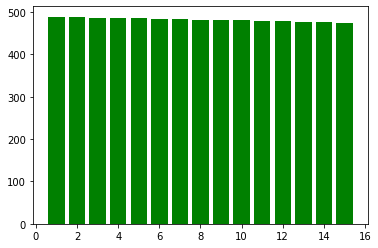

In [75]:
avg_s1=np.sum(week1s)/len(week1s)
avg_s2=np.sum(week2s)/len(week2s)
avg_s3=np.sum(week3s)/len(week3s)
avg_s4=np.sum(week4s)/len(week4s)
avg_s5=np.sum(week5s)/len(week5s)
avg_s6=np.sum(week6s)/len(week6s)
avg_s7=np.sum(week7s)/len(week7s)
avg_s8=np.sum(week8s)/len(week8s)
avg_s9=np.sum(week9s)/len(week9s)
avg_s10=np.sum(week10s)/len(week10s)
avg_s11=np.sum(week11s)/len(week11s)
avg_s12=np.sum(week12s)/len(week12s)
avg_s13=np.sum(week13s)/len(week13s)
avg_s14=np.sum(week14s)/len(week14s)
avg_s15=np.sum(week15s)/len(week15s)
avg_s=[]
avg_s.append(avg_s1)
avg_s.append(avg_s2)
avg_s.append(avg_s3)
avg_s.append(avg_s4)
avg_s.append(avg_s5)
avg_s.append(avg_s6)
avg_s.append(avg_s7)
avg_s.append(avg_s8)
avg_s.append(avg_s9)
avg_s.append(avg_s10)
avg_s.append(avg_s11)
avg_s.append(avg_s12)
avg_s.append(avg_s13)
avg_s.append(avg_s14)
avg_s.append(avg_s15)
time=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.bar(time,avg_s, width=0.8, color='g')

<BarContainer object of 15 artists>

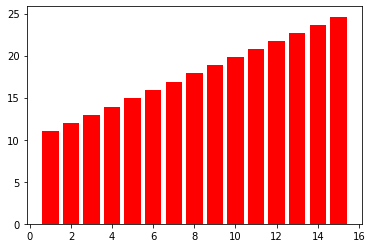

In [76]:
avg_i1=np.sum(week1i)/len(week1i)
avg_i2=np.sum(week2i)/len(week2i)
avg_i3=np.sum(week3i)/len(week3i)
avg_i4=np.sum(week4i)/len(week4i)
avg_i5=np.sum(week5i)/len(week5i)
avg_i6=np.sum(week6i)/len(week6i)
avg_i7=np.sum(week7i)/len(week7i)
avg_i8=np.sum(week8i)/len(week8i)
avg_i9=np.sum(week9i)/len(week9i)
avg_i10=np.sum(week10i)/len(week10i)
avg_i11=np.sum(week11i)/len(week11i)
avg_i12=np.sum(week12i)/len(week12i)
avg_i13=np.sum(week13i)/len(week13i)
avg_i14=np.sum(week14i)/len(week14i)
avg_i15=np.sum(week15i)/len(week15i)
avg_i=[]
avg_i.append(avg_i1)
avg_i.append(avg_i2)
avg_i.append(avg_i3)
avg_i.append(avg_i4)
avg_i.append(avg_i5)
avg_i.append(avg_i6)
avg_i.append(avg_i7)
avg_i.append(avg_i8)
avg_i.append(avg_i9)
avg_i.append(avg_i10)
avg_i.append(avg_i11)
avg_i.append(avg_i12)
avg_i.append(avg_i13)
avg_i.append(avg_i14)
avg_i.append(avg_i15)
time=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.bar(time,avg_i, width=0.8, color='r')


<BarContainer object of 15 artists>

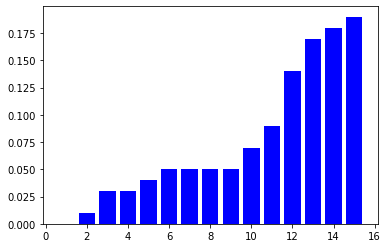

In [77]:
avg_r1=np.sum(week1r)/len(week1r)
avg_r2=np.sum(week2r)/len(week2r)
avg_r3=np.sum(week3r)/len(week3r)
avg_r4=np.sum(week4r)/len(week4r)
avg_r5=np.sum(week5r)/len(week5r)
avg_r6=np.sum(week6r)/len(week6r)
avg_r7=np.sum(week7r)/len(week7r)
avg_r8=np.sum(week8r)/len(week8r)
avg_r9=np.sum(week9r)/len(week9r)
avg_r10=np.sum(week10r)/len(week10r)
avg_r11=np.sum(week11r)/len(week11r)
avg_r12=np.sum(week12r)/len(week12r)
avg_r13=np.sum(week13r)/len(week13r)
avg_r14=np.sum(week14r)/len(week14r)
avg_r15=np.sum(week15r)/len(week15r)
avg_r=[]
avg_r.append(avg_r1)
avg_r.append(avg_r2)
avg_r.append(avg_r3)
avg_r.append(avg_r4)
avg_r.append(avg_r5)
avg_r.append(avg_r6)
avg_r.append(avg_r7)
avg_r.append(avg_r8)
avg_r.append(avg_r9)
avg_r.append(avg_r10)
avg_r.append(avg_r11)
avg_r.append(avg_r12)
avg_r.append(avg_r13)
avg_r.append(avg_r14)
avg_r.append(avg_r15)
time=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.bar(time,avg_r, width=0.8, color='b')


# 3

Vacc(t) = [0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60].

In [ ]:
v_w1=0
v_w2=5
v_w3=15
v_w4=25
v_w5=35
v_w6=45
v_w7=55
v_w8=60
v_w9=60
v_w10=60
v_w11=60
v_w12=60
v_w13=60
v_w14=60
v_w15=60

In [46]:
import scipy.io as sio
import networkx as nx
import numpy as np
import scipy as sp
import collections 
import matplotlib.pyplot as plt
import random
# S=0, I=1, R=2


# Mutation kernel
psi = np.array([[1,0,0],
                [0,0,1],
                [0,0,1]])

# Nodes activation rate rho
rho = 0.7

# Pairwise interaction kernels
# 3-dimensional array
phi = np.array([[[1,0,0],
                 [0,1,0],
                 [0,0,1]], 
                [[0,1,0],
                 [0,1,0],
                 [0,0,1]],
                [[1,0,0],
                 [0,1,0],
                 [0,0,1]]])

# Links activation rate beta
beta = 0.3

# Initialize the time
time = np.zeros(15)
t_next = 0
week1s=np.zeros(100)
week2s=np.zeros(100)
week3s=np.zeros(100)
week4s=np.zeros(100)
week5s=np.zeros(100)
week6s=np.zeros(100)
week7s=np.zeros(100)
week8s=np.zeros(100)
week9s=np.zeros(100)
week10s=np.zeros(100)
week11s=np.zeros(100)
week12s=np.zeros(100)
week13s=np.zeros(100)
week14s=np.zeros(100)
week15s=np.zeros(100)
week1r=np.zeros(100)
week2r=np.zeros(100)
week3r=np.zeros(100)
week4r=np.zeros(100)
week5r=np.zeros(100)
week6r=np.zeros(100)
week7r=np.zeros(100)
week8r=np.zeros(100)
week9r=np.zeros(100)
week10r=np.zeros(100)
week11r=np.zeros(100)
week12r=np.zeros(100)
week13r=np.zeros(100)
week14r=np.zeros(100)
week15r=np.zeros(100)
week1i=np.zeros(100)
week2i=np.zeros(100)
week3i=np.zeros(100)
week4i=np.zeros(100)
week5i=np.zeros(100)
week6i=np.zeros(100)
week7i=np.zeros(100)
week8i=np.zeros(100)
week9i=np.zeros(100)
week10i=np.zeros(100)
week11i=np.zeros(100)
week12i=np.zeros(100)
week13i=np.zeros(100)
week14i=np.zeros(100)
week15i=np.zeros(100)

for i in range(100): 
  k=6
  initial_nodes=k+1
  G = nx.DiGraph()
  G=nx.complete_graph(initial_nodes, nx.DiGraph())


  degr=np.ones(500)*k
  degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)

  # count for each out-degree value, how many nodes have that out-degree
  # degreeCount is a list of tuples (degree value, number of nodes)
  degreeCount = collections.Counter(degr)#number of nodes with each degree
  # zip() returns an iterator of tuples where the first item in each passed tuple 
  # is paired together, the second item in each passed tuple are paired together
  # and so on.
  # In this way we obtain deg, which is the tuple of degree values, and
  # cnt which is the tuple of the counts.
  #print(degreeCount)
  deg, cnt = zip(*degreeCount.items())
  deg_distr = np.array(cnt)/sum(cnt)

  # set a, the intrinsic probability of a node to be selected as a neighbor 
  # from new nodes
  a = 1

  # add the remaining nodes one at a time
  for node in range(initial_nodes,500):
      # compute degree of new node according to deg_distr (degree distribution
      # of the real citation graph).
      # the min guarantees that the new node is not assigned a degree
      # larger than the current size of GPA
      degree = k
      # choose `degree` neighbors for node to connect to according to their 
      # in-degree in the current approximation G.
      # compute updated in degree sequence
      in_deg_PA = [d for n, d in G.in_degree()] 
      # add a so that also node with 0 in-degree have non-zero probability
      # of being chosen
      in_deg_PA = np.array(in_deg_PA)+a 
      # normalize to obtain a probability distribution
      in_deg_PA = in_deg_PA/sum(in_deg_PA)
      # replace=False guarantees no neighbor is chosen twice
      b=np.arange(len(G))
      neighbors = np.random.choice(b, p=in_deg_PA, size=degree, replace=False)
      # add the new node (new node is added even if its out-degree is zero)
      G.add_node(node)

      # add the new links 
      for neigh in neighbors:
          G.add_edge(node,neigh)
      degr[node]=degree 

  # Adjacency matrix, interactions are encoded in the graph.
  W = nx.convert_matrix.to_numpy_matrix(G)
  n_agents = len(G)

  # Number of states for each agent
  n_states = tuple(3 for _ in range(n_agents))


  #inizialize the variables
  new_i=np.zeros(15)
  s=np.zeros(15)
  inf=np.zeros(15)
  r=np.zeros(15)
  lst1=[]
  lst2=[]
  lst3=[]
  # store the ids of visited configurations, describing the state of each agent
  states = list()
  # in the initial configuration, agent 0 is infected
  x0 = np.zeros(n_agents, dtype=int)
  x0[4] = 1
  x0[7] = 1
  x0[3] = 1
  x0[8] = 1
  x0[9] = 1
  x0[1] = 1
  x0[40] = 1
  x0[30] = 1
  x0[76] = 1
  x0[45] = 1

  #x0 = tuple(x0)

  # define initial state (time 0)
  states.append(tuple(x0))

  n=[]
  j=1
  for j in range(15):
      # consider the current configuration
      x = np.array(states[j-1])
      # define a list of admissible destination configurations, 
      # and the rates of the corresponding transitions
      destinations = list()
      transition_rates = list()    
      # admissible destinations differ from the current configuration
      # for the state of a single agent
      for agent in range(n_agents):
          # compute the neighbors of the other_agent in the graph
          neighbors = [i for i in G.neighbors(agent)]
          infected = sum(list(filter(lambda k:k==1, x[neighbors])))
          phi_xy = 1 - (1-beta)**infected
          # construct an admissible destination and append it to the list
          y = np.array(x)
          y[agent] = 1-y[agent]
          y_id = tuple(y)
          destinations.append(y_id)
          # compute the transition rate from x to y
          rate = 0
          for other_agent in range(n_agents):
              # for every other_agent in the network, 
              # compute its contribution to the rate of the transition of the agent
              rate += psi[x[agent],y[agent]]*rho + beta*W[agent,other_agent]*phi[x[other_agent], x[agent], y[agent]]*phi_xy
          transition_rates.append(rate) 
      # given all transition rates from x to admissible y
      # compute w_x, the clock rate of configuration x
      # Notice: transition_rates is the x-th row of Lambda
      transition_rates = np.array(transition_rates)
      w_x = np.sum(transition_rates)
      # probabilities of transitioning to each admissible configuration y
      probabilities = transition_rates / w_x
      # next state is chosen at random from the possible destination 
      # with the probability distribution probabilities
      index_destin = np.arange(len(destinations))
      index_destin = np.random.choice(index_destin, p=probabilities)
      states.append(destinations[index_destin])
      node_link_activ= np.argwhere(node_link_activ_sum>np.random.rand())[0][0]

      agent_index=destinations[index_destin][0]
      actual_status=x[agent_index]
      if x0[index_destin] == 2:
          new_status=x0[index_destin]
      else:
        if (node_link_activ==0 or w_x==0):
          new_status=x0[index_destin]
        if (node_link_activ==1):
          new_status=x0[index_destin]+1
          #print(new_status)
      x0[index_destin]=new_status
        #print(x)

      
      time[j]=j
      #print(node_link_activ)
      #if w_x == 0:
       # states[i] = states[i-1]
       ## else, transition probabilities are computed as transition_rates/w_x
       ## and the next config is chosen accordingly.
       ## Notice: this is the x-th row of P
      #else:
       # states[i] = np.random.choice(destinations, probabilities)
      t_next += -np.log(np.random.rand())/w_x
      
      s[j]=len(np.argwhere(x==0))
      inf[j]=len(np.argwhere(x==1))
      r[j]=len(np.argwhere(x==2))

      if(j==0):
        week1s[i]=s[j]
        week1i[i]=inf[j]
        week1r[i]=r[j]
      if(j==1):
        week2s[i]=(s[j])
        week2i[i]=(inf[j])
        week2r[i]=(r[j])
      if(j==2):
        week3s[i]=(s[j])
        week3i[i]=(inf[j])
        week3r[i]=(r[j])
      if(j==3):
        week4s[i]=(s[j])
        week4i[i]=(inf[j])
        week4r[i]=(r[j])
      if(j==4):
        week5s[i]=(s[j])
        week5i[i]=(inf[j])
        week5r[i]=(r[j])
      if(j==5):
        week6s[i]=(s[j])
        week6i[i]=(inf[j])
        week6r[i]=(r[j])
      if(j==6):
        week7s[i]=(s[j])
        week7i[i]=(inf[j])
        week7r[i]=(r[j])
      if(j==7):
        week8s[i]=(s[j])
        week8i[i]=(inf[j])
        week8r[i]=(r[j])
      if(j==8):
        week9s[i]=(s[j])
        week9i[i]=(inf[j])
        week9r[i]=(r[j])
      if(j==9):
        week10s[i]=(s[j])
        week10i[i]=(inf[j])
        week10r[i]=(r[j])
      if(j==10):
        week11s[i]=(s[j])
        week11i[i]=(inf[j])
        week11r[i]=(r[j])        
      if(j==11):
        week12s[i]=(s[j])
        week12i[i]=(inf[j])
        week12r[i]=(r[j])
      if(j==12):
        week13s[i]=(s[j])
        week13i[i]=(inf[j])
        week13r[i]=(r[j])
      if(j==13):
        week14s[i]=(s[j])
        week14i[i]=(inf[j])
        week14r[i]=(r[j])
      if(j==14):
        week15s[i]=(s[j])
        week15i[i]=(inf[j])
        week15r[i]=(r[j])

      new_i[j]=(inf[j]-inf[j-1])
  print(new_i)
  plt.plot(new_i)






AttributeError: ignored

[11.  1.  1. -2.  0. -1.  0. -2.  0.  0.  0.  1.  0.  1.  0.]
[11.  1.  1. -1. -2. -1.  1.  0.  0.  0.  1.  0.  0.  0.  1.]
[11.  1.  1. -2. -2.  0.  1.  0. -1.  0.  0.  0.  1.  1.  1.]
[11.  1.  1. -3. -1. -1.  0.  0.  0.  0.  1.  1.  1.  0.  1.]
[11.  1.  0. -1. -1.  0.  0. -1. -1.  1.  1.  0.  0.  1.  1.]
[11.  1. -1. -1. -3.  0.  1. -2.  0.  1.  1.  0.  1.  0.  1.]
[11.  1.  0.  0. -2. -2.  0. -1. -1.  0.  1.  1.  0.  0.  1.]
[11.  1.  1. -2. -2.  0.  1.  0. -1.  0.  0.  1.  0.  0.  0.]
[11.  1.  1. -3.  1. -2.  1. -4.  1.  0.  0.  0.  0.  1.  0.]
[11.  1.  1. -1.  1. -1.  1. -1.  0.  0.  1.  1.  0.  0.  0.]
[11.  1.  1.  0. -4. -1.  1.  1. -1.  1.  0.  1.  1.  0.  1.]
[11.  1.  1.  0. -1.  0.  1. -2.  1.  0.  0.  0.  0.  1.  0.]
[11.  1. -1. -1. -1. -2.  1.  1.  0.  1.  0.  0.  0.  0.  1.]
[11.  1.  1. -3.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
[11.  1.  1. -3.  0.  0.  1. -2. -1.  0.  1.  1.  0.  0.  0.]
[11.  1.  1. -5.  0.  0.  1. -3.  0.  1.  0.  0.  0.  0.  0.]
[11.  1.

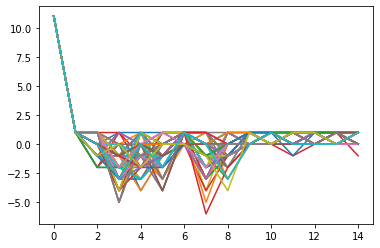

In [70]:
# Number of agents, the number of nodes in the graph
n_agents = len(G)

# S=0, I=1, R=2

# Mutation kernel
psi = np.array([[1,0,0],
                [0,0,1],
                [0,0,1]])

# Nodes activation rate rho
rho = 0.7

# Pairwise interaction kernels
# 3-dimensional array
phi = np.array([[[1,0,0],
                 [0,1,0],
                 [0,0,1]], 
                [[0,1,0],
                 [0,1,0],
                 [0,0,1]],
                [[1,0,0],
                 [0,1,0],
                 [0,0,1]]])

# Links activation rate beta
beta = 0.3

# Adjacency matrix, interactions are encoded in the graph.
W = nx.convert_matrix.to_numpy_matrix(G)

# Number of states for each agent
n_states = tuple(3 for _ in range(n_agents))

# Initialize the time
time = np.zeros(15)
t_next = 0
week1s=np.zeros(100)
week2s=np.zeros(100)
week3s=np.zeros(100)
week4s=np.zeros(100)
week5s=np.zeros(100)
week6s=np.zeros(100)
week7s=np.zeros(100)
week8s=np.zeros(100)
week9s=np.zeros(100)
week10s=np.zeros(100)
week11s=np.zeros(100)
week12s=np.zeros(100)
week13s=np.zeros(100)
week14s=np.zeros(100)
week15s=np.zeros(100)
week1r=np.zeros(100)
week2r=np.zeros(100)
week3r=np.zeros(100)
week4r=np.zeros(100)
week5r=np.zeros(100)
week6r=np.zeros(100)
week7r=np.zeros(100)
week8r=np.zeros(100)
week9r=np.zeros(100)
week10r=np.zeros(100)
week11r=np.zeros(100)
week12r=np.zeros(100)
week13r=np.zeros(100)
week14r=np.zeros(100)
week15r=np.zeros(100)
week1i=np.zeros(100)
week2i=np.zeros(100)
week3i=np.zeros(100)
week4i=np.zeros(100)
week5i=np.zeros(100)
week6i=np.zeros(100)
week7i=np.zeros(100)
week8i=np.zeros(100)
week9i=np.zeros(100)
week10i=np.zeros(100)
week11i=np.zeros(100)
week12i=np.zeros(100)
week13i=np.zeros(100)
week14i=np.zeros(100)
week15i=np.zeros(100)

for i in range(100):

  k=6
  initial_nodes=k+1
  G = nx.DiGraph()
  G=nx.complete_graph(initial_nodes, nx.DiGraph())


  degr=np.ones(500)*k
  degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)

  # count for each out-degree value, how many nodes have that out-degree
  # degreeCount is a list of tuples (degree value, number of nodes)
  degreeCount = collections.Counter(degr)#number of nodes with each degree
  # zip() returns an iterator of tuples where the first item in each passed tuple 
  # is paired together, the second item in each passed tuple are paired together
  # and so on.
  # In this way we obtain deg, which is the tuple of degree values, and
  # cnt which is the tuple of the counts.
  #print(degreeCount)
  deg, cnt = zip(*degreeCount.items())
  deg_distr = np.array(cnt)/sum(cnt)

  # set a, the intrinsic probability of a node to be selected as a neighbor 
  # from new nodes
  a = 1
  people=[]
  # add the remaining nodes one at a time
  for node in range(initial_nodes,500):
      # compute degree of new node according to deg_distr (degree distribution
      # of the real citation graph).
      # the min guarantees that the new node is not assigned a degree
      # larger than the current size of GPA
      degree = k
      # choose `degree` neighbors for node to connect to according to their 
      # in-degree in the current approximation G.
      # compute updated in degree sequence
      in_deg_PA = [d for n, d in G.in_degree()] 
      # add a so that also node with 0 in-degree have non-zero probability
      # of being chosen
      in_deg_PA = np.array(in_deg_PA)+a 
      # normalize to obtain a probability distribution
      in_deg_PA = in_deg_PA/sum(in_deg_PA)
      # replace=False guarantees no neighbor is chosen twice
      b=np.arange(len(G))
      neighbors = np.random.choice(b, p=in_deg_PA, size=degree, replace=False)
      # add the new node (new node is added even if its out-degree is zero)
      G.add_node(node)

      # add the new links 
      for neigh in neighbors:
          G.add_edge(node,neigh)
      degr[node]=degree 

  #inizialize the variables
  new_i=np.zeros(15)
  s=np.zeros(15)
  inf=np.zeros(15)
  r=np.zeros(15)
  lst1=[]
  lst2=[]
  lst3=[]
  # store the ids of visited configurations, describing the state of each agent
  states = list()
  # in the initial configuration, agent 0 is infected
  x0 = np.zeros(n_agents, dtype=int)
  x0[4] = 1
  x0[7] = 1
  x0[3] = 1
  x0[8] = 1
  x0[9] = 1
  x0[1] = 1
  x0[40] = 1
  x0[30] = 1
  x0[76] = 1
  x0[45] = 1
  
  #x0 = tuple(x0)

  # define initial state (time 0)
  states.append(tuple(x0))
  for k in range(500):
    people.append(k)

  j=1
  for j in range(15):
      # consider the current configuration
      x = np.array(states[j-1])
      # define a list of admissible destination configurations, 
      # and the rates of the corresponding transitions
      destinations = list()
      transition_rates = list()    
      # admissible destinations differ from the current configuration
      # for the state of a single agent
      for agent in range(n_agents):
          # compute the neighbors of the other_agent in the graph
          neighbors = [i for i in G.neighbors(agent)]
          infected = sum(list(filter(lambda k:k==1, x[neighbors])))
          phi_xy = 1 - (1-beta)**infected
          # construct an admissible destination and append it to the list
          y = np.array(x)
          y[agent] = 1-y[agent]
          y_id = tuple(y)
          destinations.append(y_id)
          # compute the transition rate from x to y
          rate = 0
          for other_agent in range(n_agents):
              # for every other_agent in the network, 
              # compute its contribution to the rate of the transition of the agent
              rate += psi[x[agent],y[agent]]*rho + beta*W[agent,other_agent]*phi[x[other_agent], x[agent], y[agent]]*phi_xy
          transition_rates.append(rate) 
      # given all transition rates from x to admissible y
      # compute w_x, the clock rate of configuration x
      # Notice: transition_rates is the x-th row of Lambda
      transition_rates = np.array(transition_rates)
      w_x = np.sum(transition_rates)
      # probabilities of transitioning to each admissible configuration y
      probabilities = transition_rates / w_x
      # next state is chosen at random from the possible destination 
      # with the probability distribution probabilities
      index_destin = np.arange(len(destinations))
      index_destin = np.random.choice(index_destin, p=probabilities)
      states.append(destinations[index_destin])
      node_link_activ=(node_link_activ_sum>np.random.rand())[1]



      if j==2:
        vax=random.sample(people,25)
        x0[vax]=2
      if j==3:
        for v in vax:
          people.remove(v)
        vax=random.sample(people,50)
        x0[vax]=2
      if j==3:
        for v in vax:
          people.remove(v)
        vax=random.sample(people,50)
        x0[vax]=2
      if j==4:
        for v in vax:
          people.remove(v)
        vax=random.sample(people,50)
        x0[vax]=2
      if j==5:
        for v in vax:
          people.remove(v)
        vax=random.sample(people,50)
        x0[vax]=2
      if j==6:
        for v in vax:
          people.remove(v)
        vax=random.sample(people,50)
        x[vax]=2
      if j==7:
        for v in vax:
          people.remove(v)
        vax=random.sample(people,50)
        x0[vax]=2
      if j==8:
        for v in vax:
          people.remove(v)
        vax=random.sample(people,25)
        x0[vax]=2
    
      

      #for agent in range(n_agents):
      agent_index=destinations[index_destin][0]
      actual_status=x[agent_index]
      if x0[index_destin] == 2:
          new_status=x0[index_destin]
      else:
        if (node_link_activ==0 or w_x==0):
          new_status=x0[index_destin]
        if (node_link_activ==1):
          new_status=x0[index_destin]+1
          #print(new_status)
      x0[index_destin]=new_status
        #print(x)
      
      states[0]=x

      
      time[j]=j
      #print(node_link_activ)
      #if w_x == 0:
       # states[i] = states[i-1]
       ## else, transition probabilities are computed as transition_rates/w_x
       ## and the next config is chosen accordingly.
       ## Notice: this is the x-th row of P
      #else:
       # states[i] = np.random.choice(destinations, probabilities)
      t_next += -np.log(np.random.rand())/w_x
      
      s[j]=len(np.argwhere(x0==0))
      inf[j]=len(np.argwhere(x0==1))
      r[j]=len(np.argwhere(x0==2))

      if(j==0):
        week1s[i]=s[j]
        week1i[i]=inf[j]
        week1r[i]=r[j]
      if(j==1):
        week2s[i]=(s[j])
        week2i[i]=(inf[j])
        week2r[i]=(r[j])
      if(j==2):
        week3s[i]=(s[j])
        week3i[i]=(inf[j])
        week3r[i]=(r[j])
      if(j==3):
        week4s[i]=(s[j])
        week4i[i]=(inf[j])
        week4r[i]=(r[j])
      if(j==4):
        week5s[i]=(s[j])
        week5i[i]=(inf[j])
        week5r[i]=(r[j])
      if(j==5):
        week6s[i]=(s[j])
        week6i[i]=(inf[j])
        week6r[i]=(r[j])
      if(j==6):
        week7s[i]=(s[j])
        week7i[i]=(inf[j])
        week7r[i]=(r[j])
      if(j==7):
        week8s[i]=(s[j])
        week8i[i]=(inf[j])
        week8r[i]=(r[j])
      if(j==8):
        week9s[i]=(s[j])
        week9i[i]=(inf[j])
        week9r[i]=(r[j])
      if(j==9):
        week10s[i]=(s[j])
        week10i[i]=(inf[j])
        week10r[i]=(r[j])
      if(j==10):
        week11s[i]=(s[j])
        week11i[i]=(inf[j])
        week11r[i]=(r[j])        
      if(j==11):
        week12s[i]=(s[j])
        week12i[i]=(inf[j])
        week12r[i]=(r[j])
      if(j==12):
        week13s[i]=(s[j])
        week13i[i]=(inf[j])
        week13r[i]=(r[j])
      if(j==13):
        week14s[i]=(s[j])
        week14i[i]=(inf[j])
        week14r[i]=(r[j])
      if(j==14):
        week15s[i]=(s[j])
        week15i[i]=(inf[j])
        week15r[i]=(r[j])

      new_i[j]=(inf[j]-inf[j-1])
  print(new_i)
  plt.plot(new_i)
      #plt.plot(new_i, time)
  #plt.plot(time,s, color="g")
  #plt.plot(time,inf, color="r")
  #plt.plot(time,r, color="b")

  #lst1.append(s)
  #lst2.append(inf)
  #lst3.append(r)
  #df=pd.DataFrame(list(zip(lst1,lst2,lst3)),columns=['susceptible','infected','recovered'])
      #print(destinations)
     # print("time", j-1)
 # print("Average Susceptible", avg_s)
 # print("Average Infected", avg_i)
 # print("Average Recovered",avg_r)

In [ ]:
      for k in range(500):
        n.append(k)
      if j==2:
        vax=random.sample(n,25)
        x0[vax]=2
      if j==3:
        n.pop(vax)
        vax=random.sample(n,50)
        x0[vax]=2
      if j==3:
        n.pop(vax)
        vax=random.sample(n,50)
        x0[vax]=2
      if j==4:
        n.pop(vax)
        vax=random.sample(n,50)
        x0[vax]=2
      if j==5:
        n.pop(vax)
        vax=random.sample(n,50)
        x0[vax]=2
      if j==6:
        n.pop(vax)
        vax=random.sample(n,50)
        x[vax]=2
      if j==7:
        n.pop(vax)
        vax=random.sample(n,50)
        x0[vax]=2
      if j==8:
        n.pop(vax)
        vax=random.sample(n,25)
        x0[vax]=2
    

<BarContainer object of 15 artists>

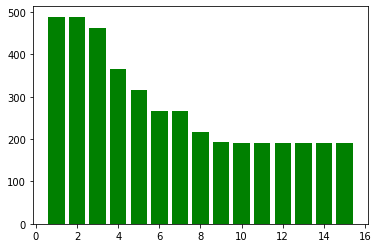

In [71]:
avg_s1=np.sum(week1s)/len(week1s)
avg_s2=np.sum(week2s)/len(week2s)
avg_s3=np.sum(week3s)/len(week3s)
avg_s4=np.sum(week4s)/len(week4s)
avg_s5=np.sum(week5s)/len(week5s)
avg_s6=np.sum(week6s)/len(week6s)
avg_s7=np.sum(week7s)/len(week7s)
avg_s8=np.sum(week8s)/len(week8s)
avg_s9=np.sum(week9s)/len(week9s)
avg_s10=np.sum(week10s)/len(week10s)
avg_s11=np.sum(week11s)/len(week11s)
avg_s12=np.sum(week12s)/len(week12s)
avg_s13=np.sum(week13s)/len(week13s)
avg_s14=np.sum(week14s)/len(week14s)
avg_s15=np.sum(week15s)/len(week15s)
avg_s=[]
avg_s.append(avg_s1)
avg_s.append(avg_s2)
avg_s.append(avg_s3)
avg_s.append(avg_s4)
avg_s.append(avg_s5)
avg_s.append(avg_s6)
avg_s.append(avg_s7)
avg_s.append(avg_s8)
avg_s.append(avg_s9)
avg_s.append(avg_s10)
avg_s.append(avg_s11)
avg_s.append(avg_s12)
avg_s.append(avg_s13)
avg_s.append(avg_s14)
avg_s.append(avg_s15)
time=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.bar(time,avg_s, width=0.8, color='g')

<BarContainer object of 15 artists>

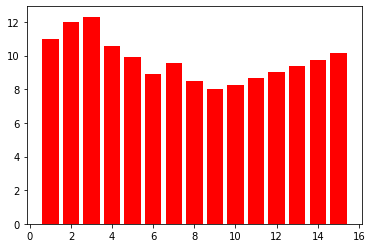

In [72]:
avg_i1=np.sum(week1i)/len(week1i)
avg_i2=np.sum(week2i)/len(week2i)
avg_i3=np.sum(week3i)/len(week3i)
avg_i4=np.sum(week4i)/len(week4i)
avg_i5=np.sum(week5i)/len(week5i)
avg_i6=np.sum(week6i)/len(week6i)
avg_i7=np.sum(week7i)/len(week7i)
avg_i8=np.sum(week8i)/len(week8i)
avg_i9=np.sum(week9i)/len(week9i)
avg_i10=np.sum(week10i)/len(week10i)
avg_i11=np.sum(week11i)/len(week11i)
avg_i12=np.sum(week12i)/len(week12i)
avg_i13=np.sum(week13i)/len(week13i)
avg_i14=np.sum(week14i)/len(week14i)
avg_i15=np.sum(week15i)/len(week15i)
avg_i=[]
avg_i.append(avg_i1)
avg_i.append(avg_i2)
avg_i.append(avg_i3)
avg_i.append(avg_i4)
avg_i.append(avg_i5)
avg_i.append(avg_i6)
avg_i.append(avg_i7)
avg_i.append(avg_i8)
avg_i.append(avg_i9)
avg_i.append(avg_i10)
avg_i.append(avg_i11)
avg_i.append(avg_i12)
avg_i.append(avg_i13)
avg_i.append(avg_i14)
avg_i.append(avg_i15)
time=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.bar(time,avg_i, width=0.8, color='r')


<BarContainer object of 15 artists>

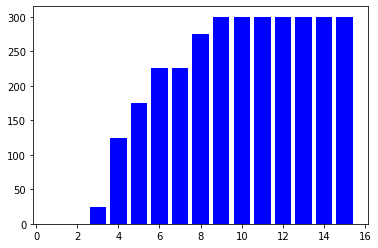

In [73]:
avg_r1=np.sum(week1r)/len(week1r)
avg_r2=np.sum(week2r)/len(week2r)
avg_r3=np.sum(week3r)/len(week3r)
avg_r4=np.sum(week4r)/len(week4r)
avg_r5=np.sum(week5r)/len(week5r)
avg_r6=np.sum(week6r)/len(week6r)
avg_r7=np.sum(week7r)/len(week7r)
avg_r8=np.sum(week8r)/len(week8r)
avg_r9=np.sum(week9r)/len(week9r)
avg_r10=np.sum(week10r)/len(week10r)
avg_r11=np.sum(week11r)/len(week11r)
avg_r12=np.sum(week12r)/len(week12r)
avg_r13=np.sum(week13r)/len(week13r)
avg_r14=np.sum(week14r)/len(week14r)
avg_r15=np.sum(week15r)/len(week15r)
avg_r=[]
avg_r.append(avg_r1)
avg_r.append(avg_r2)
avg_r.append(avg_r3)
avg_r.append(avg_r4)
avg_r.append(avg_r5)
avg_r.append(avg_r6)
avg_r.append(avg_r7)
avg_r.append(avg_r8)
avg_r.append(avg_r9)
avg_r.append(avg_r10)
avg_r.append(avg_r11)
avg_r.append(avg_r12)
avg_r.append(avg_r13)
avg_r.append(avg_r14)
avg_r.append(avg_r15)
time=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.bar(time,avg_r, width=0.8, color='b')
